## 2.3 Data exploration

Exploratory data analysis (EDA) is an important step in a project and most people spend 80% of time on it, investigation the  dataset in order to discover insight, anomalies,test hypothesis and to check the assumptions made at the beginning of the project with the help of visualisation and summary statistics. 

Looking at the stocks, you notice that all the companies are not trading at the same price and you have to do normalisation

#### Exploring the Open Price

In [1]:
import numpy as np
import pandas as pd
# For time stamps
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Your PC Name Here\SQLEXPRESS;'
                      'Database=StockDB;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

openPrice_query = pd.read_sql_query('SELECT [FullDate],[StockSymbol],[S_Open] FROM [StockDB].[dbo].[Stock_Details]',conn)
openPrice_query.head(1)

C:\Users\sonia\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


FullDate StockSymbol  S_Open
0  2012-08-03        AAPL   21.92

In [2]:
openPrice_query.tail(1)

FullDate StockSymbol  S_Open
31855  2020-07-02           V   196.0

In [3]:
df_open = openPrice_query.set_index('FullDate')
df_open.head(2)

StockSymbol     S_Open
FullDate                         
2012-08-03        AAPL  21.920000
2012-08-06        AAPL  22.049999

Reranging by changing 'StockSymbol' as the column

In [4]:
stock_tickers_open = df_open.pivot(columns='StockSymbol')
stock_tickers_open.columns = [col[1] for col in stock_tickers_open.columns]
stock_tickers_open.head(3)

AAPL        AMZN         BA         FB     GE        GOOG  \
FullDate                                                                     
2012-08-03  21.920000  234.029999  73.129997  20.360001  20.02  318.809998   
2012-08-06  22.049999  235.559998  73.209999  21.389999  20.16  318.609985   
2012-08-07  22.240000  234.130005  73.269997  22.200001  20.33  319.700012   

                   HD          J        JPM       MSFT  NFLX   OPK         PG  \
FullDate                                                                        
2012-08-03  52.200001  39.189999  35.820000  29.530001  7.84  4.15  64.709999   
2012-08-06  52.410000  39.160000  36.240002  30.000000  7.79  4.28  65.230003   
2012-08-07  52.250000  39.360001  36.570000  30.070000  8.14  4.29  65.919998   

            TSLA        UNH          V  
FullDate                                
2012-08-03  5.38  51.380001  32.590000  
2012-08-06  5.51  51.860001  32.750000  
2012-08-07  5.75  51.380001  32.709999

In [5]:
#looking for any duplicate values
stock_tickers_open.duplicated().sum()

0

In [6]:
stock_tickers_open.describe()

AAPL         AMZN           BA           FB           GE  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean     35.384812   936.454767   198.408579   117.623707    20.607730   
std      16.248864   653.464796   103.065299    58.908555     7.412135   
min      13.860000   221.309998    69.339996    18.080000     5.610000   
25%      23.775001   339.050003   127.584999    72.430000    12.865000   
50%      30.000000   743.400024   145.210007   118.389999    23.309999   
75%      44.015001  1615.479980   322.525009   172.000000    26.110001   
max      91.959999  2912.010010   446.010010   241.279999    31.690001   

              GOOG           HD            J          JPM         MSFT  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean    807.761099   138.363878    58.819503    79.223586    73.232567   
std     310.923606    53.161507    15.038603    26.258168    42.161424   
min     318.100006    52.130001    34.910000    35.820000    26.379999   
25%     539.220001    82.029999    47.285000    57.725000    41.700001   
50%     757.450012   132.330002    56.410000    67.419998    56.150002   
75%    1086.350037   184.279999    65.849998   104.695000   101.634998   
max    1525.069946   257.450012   102.000000   139.899994   205.679993   

              NFLX          OPK           PG         TSLA          UNH  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean    164.419628     7.028388    87.782451    51.804048   157.762275   
std     128.045989     3.701722    14.397236    31.107016    77.356756   
min       7.710000     1.200000    64.709999     5.380000    51.250000   
25%      59.435001     3.770000    79.084999    39.629999    82.539997   
50%     112.129997     7.180000    83.279999    47.480000   138.160004   
75%     294.360001     9.405000    90.985001    61.795000   235.340004   
max     485.640015    18.600000   127.190002   244.300003   309.899994   

                 V  
count  1991.000000  
mean     95.303099  
std      47.397564  
min      31.650000  
25%      54.654999  
50%      79.239998  
75%     134.019997  
max     212.520004

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Open Price'}, xlabel='FullDate'>

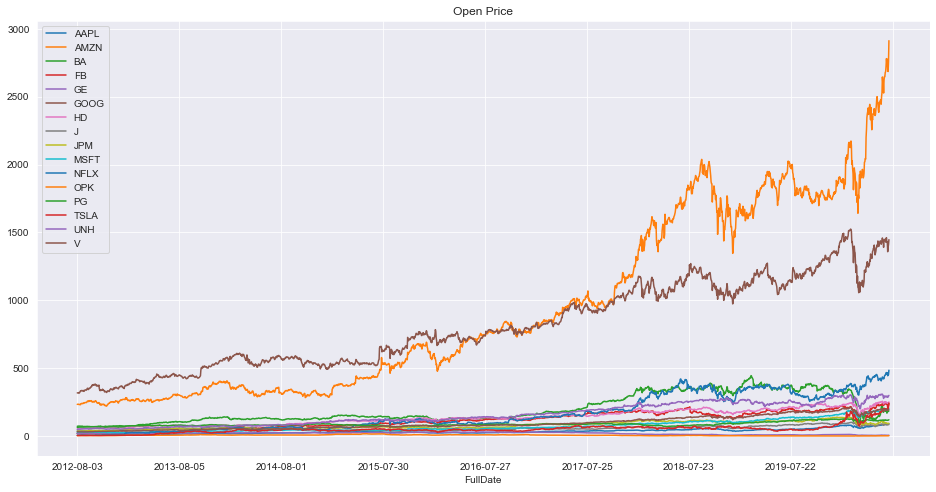

In [7]:
stock_tickers_open.plot(figsize=(16,8),title='Open Price')

#### Exploring the Volume

In [8]:
volume_query = pd.read_sql_query('SELECT [FullDate],[StockSymbol],[S_Volume] FROM [StockDB].[dbo].[Stock_Details]',conn)
volume_query.head(1)

FullDate StockSymbol     S_Volume
0  2012-08-03        AAPL  344920800.0

In [9]:
df_volume = volume_query.set_index('FullDate')
df_volume.head(3)

StockSymbol     S_Volume
FullDate                           
2012-08-03        AAPL  344920800.0
2012-08-06        AAPL  302103200.0
2012-08-07        AAPL  290446784.0

In [10]:
stock_tickers_volume =df_volume.pivot(columns='StockSymbol')
stock_tickers_volume.columns = [col[1] for col in stock_tickers_volume.columns]
stock_tickers_volume.head(3)

AAPL       AMZN         BA          FB          GE  \
FullDate                                                                
2012-08-03  344920800.0  2825300.0  4588500.0  80647000.0  39407100.0   
2012-08-06  302103200.0  1843700.0  3758800.0  27778900.0  35525800.0   
2012-08-07  290446784.0  2058300.0  4717200.0  36782900.0  32359900.0   

                 GOOG         HD         J         JPM        MSFT  \
FullDate                                                             
2012-08-03  3808300.0  7484300.0  884100.0  24516300.0  35859400.0   
2012-08-06  3578000.0  7471600.0  677900.0  18979200.0  27471800.0   
2012-08-07  3978300.0  6519100.0  881000.0  37225800.0  28002900.0   

                  NFLX       OPK          PG        TSLA        UNH  \
FullDate                                                              
2012-08-03  37295300.0  814100.0  15279100.0   6047500.0  6408000.0   
2012-08-06  28527800.0  858000.0  10034400.0   7641000.0  4982600.0   
2012-08-07  30769900.0  722500.0  10463300.0  11936000.0  6590800.0   

                     V  
FullDate                
2012-08-03  12934400.0  
2012-08-06   9227600.0  
2012-08-07  13179200.0

In [11]:
#looking for any duplicate values
stock_tickers_volume.duplicated().sum()

0

In [12]:
stock_tickers_volume.describe()

AAPL          AMZN            BA            FB            GE  \
count  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03   
mean   2.105742e+08  4.030573e+06  6.169462e+06  3.239203e+07  5.619432e+07   
std    1.576971e+08  2.237308e+06  9.410982e+06  2.649643e+07  4.317309e+07   
min    4.544800e+07  8.813000e+05  7.889000e+05  5.913100e+06  1.368790e+07   
25%    1.076472e+08  2.650450e+06  2.991600e+06  1.621535e+07  3.119115e+07   
50%    1.581260e+08  3.422300e+06  3.944400e+06  2.379550e+07  4.176640e+07   
75%    2.589802e+08  4.666500e+06  5.309900e+06  3.886840e+07  6.545630e+07   
max    1.460852e+09  2.385610e+07  1.032128e+08  3.654579e+08  4.485859e+08   

               GOOG            HD             J           JPM          MSFT  \
count  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03   
mean   2.321509e+06  5.518861e+06  1.043876e+06  1.660246e+07  3.400331e+07   
std    1.740959e+06  2.479753e+06  5.283364e+05  7.236238e+06  1.861326e+07   
min    7.900000e+03  1.517100e+06  1.946000e+05  3.324300e+06  7.425600e+06   
25%    1.301250e+06  3.829950e+06  6.895500e+05  1.163350e+07  2.266110e+07   
50%    1.720500e+06  4.951700e+06  9.180000e+05  1.480030e+07  2.946710e+07   
75%    2.766400e+06  6.609400e+06  1.241550e+06  1.955120e+07  3.947960e+07   
max    2.497790e+07  2.279290e+07  6.154700e+06  6.088080e+07  2.484285e+08   

               NFLX           OPK            PG          TSLA           UNH  \
count  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03  1.991000e+03   
mean   1.537700e+07  4.536243e+06  8.919948e+06  3.596024e+07  4.167046e+06   
std    1.415481e+07  5.453209e+06  5.860670e+06  2.793474e+07  2.211389e+06   
min    1.616300e+06  0.000000e+00  2.022100e+06  1.879000e+06  7.140000e+05   
25%    6.976750e+06  2.305350e+06  6.384400e+06  1.891350e+07  2.836850e+06   
50%    1.157130e+07  3.355800e+06  7.712100e+06  2.875350e+07  3.659000e+06   
75%    1.881840e+07  4.956350e+06  9.714500e+06  4.345050e+07  4.893550e+06   
max    1.914458e+08  1.111781e+08  1.237357e+08  3.046940e+08  2.736140e+07   

                  V  
count  1.991000e+03  
mean   9.756530e+06  
std    5.246627e+06  
min    2.188800e+06  
25%    6.660500e+06  
50%    8.575200e+06  
75%    1.147220e+07  
max    9.007360e+07

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Volume Sold'}, xlabel='FullDate'>

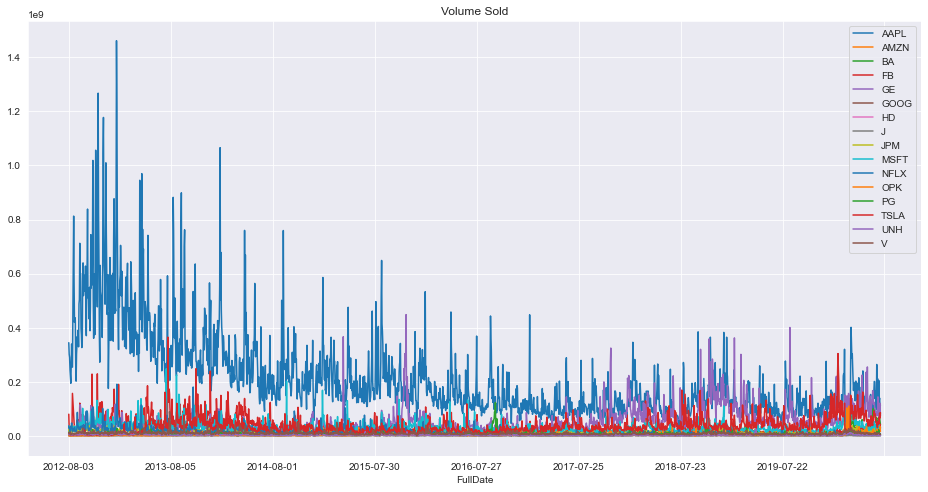

In [13]:
stock_tickers_volume.plot(figsize=(16,8),title='Volume Sold')

In [14]:
stock_tickers_volume.max()

AAPL    1.460852e+09
AMZN    2.385610e+07
BA      1.032128e+08
FB      3.654579e+08
GE      4.485859e+08
GOOG    2.497790e+07
HD      2.279290e+07
J       6.154700e+06
JPM     6.088080e+07
MSFT    2.484285e+08
NFLX    1.914458e+08
OPK     1.111781e+08
PG      1.237357e+08
TSLA    3.046940e+08
UNH     2.736140e+07
V       9.007360e+07
dtype: float64

In [15]:
stock_tickers_volume.idxmax()

AAPL    2013-01-24
AMZN    2015-01-30
BA      2020-06-11
FB      2013-07-25
GE      2015-11-17
GOOG    2012-10-18
HD      2013-02-26
J       2018-11-20
JPM     2013-03-15
MSFT    2013-07-19
NFLX    2013-01-25
OPK     2020-03-13
PG      2016-09-30
TSLA    2020-02-04
UNH     2019-04-16
V       2013-07-31
dtype: object

#### Exploring the Adjusted Close

In [16]:
adjClose_query = pd.read_sql_query('SELECT [FullDate],[StockSymbol],[S_Adj_Close] FROM [StockDB].[dbo].[Stock_Details]',conn)
adjClose_query.head(1)

FullDate StockSymbol  S_Adj_Close
0  2012-08-03        AAPL         19.0

In [17]:
df_adjClose = adjClose_query.set_index('FullDate')
df_adjClose.head(3)

StockSymbol  S_Adj_Close
FullDate                           
2012-08-03        AAPL    19.000000
2012-08-06        AAPL    19.209999
2012-08-07        AAPL    19.160000

In [18]:
stock_tickers_adjClose =df_adjClose.pivot(columns='StockSymbol')
stock_tickers_adjClose.columns = [col[1] for col in stock_tickers_adjClose.columns]
stock_tickers_adjClose.head(3)

AAPL        AMZN         BA         FB         GE  \
FullDate                                                             
2012-08-03  19.000000  234.970001  59.820000  21.090000  15.990000   
2012-08-06  19.209999  233.990005  59.880001  21.920000  16.000000   
2012-08-07  19.160000  236.559998  61.169998  20.719999  16.110001   

                  GOOG         HD          J        JPM   MSFT  NFLX   OPK  \
FullDate                                                                     
2012-08-03  319.470001  43.570000  37.639999  28.809999  24.67  7.70  4.29   
2012-08-06  320.209991  43.330002  37.980000  28.969999  24.83  8.11  4.27   
2012-08-07  319.070007  43.660000  37.959999  29.540001  25.09  8.27  4.27   

                   PG  TSLA        UNH      V  
FullDate                                       
2012-08-03  51.189999  5.45  45.049999  30.82  
2012-08-06  51.430000  5.65  44.520000  30.83  
2012-08-07  51.750000  6.05  45.860001  30.68

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Ajusted Close'}, xlabel='FullDate'>

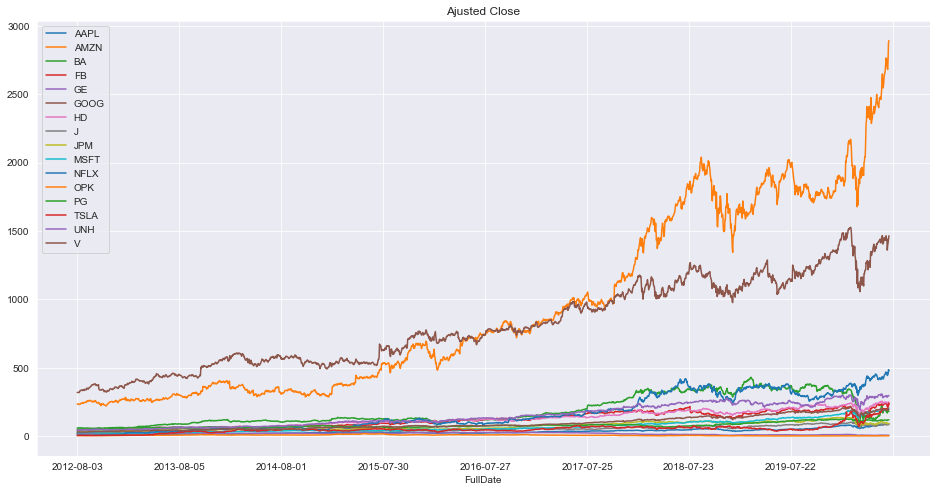

In [19]:
stock_tickers_adjClose.plot(figsize=(16,8),title='Ajusted Close')

finding the daily returns

In [20]:
stocks_returns = stock_tickers_adjClose.pct_change(1).dropna()
stocks_returns

AAPL      AMZN        BA        FB        GE      GOOG  \
FullDate                                                                 
2012-08-06  0.011053 -0.004171  0.001003  0.039355  0.000625  0.002316   
2012-08-07 -0.002603  0.010983  0.021543 -0.054745  0.006875 -0.003560   
2012-08-08 -0.001566 -0.009215  0.001962  0.000000 -0.004966  0.002664   
2012-08-09  0.005750 -0.001365 -0.004242  0.013996  0.002495  0.000188   
2012-08-10  0.001559 -0.005597 -0.000983  0.038077  0.001867 -0.000563   
...              ...       ...       ...       ...       ...       ...   
2020-06-26 -0.030752 -0.022403 -0.027848 -0.083164 -0.028486 -0.056496   
2020-06-29  0.023003 -0.004638  0.143992  0.021103  0.049383  0.025789   
2020-06-30  0.008418  0.029265 -0.057535  0.029143  0.004412  0.013362   
2020-07-01 -0.001977  0.043453 -0.016257  0.046153 -0.013177  0.017282   
2020-07-02  0.000000  0.004030  0.002717 -0.017386  0.011869  0.018539   

                  HD         J       JPM      MSFT      NFLX       OPK  \
FullDate                                                                 
2012-08-06 -0.005508  0.009033  0.005554  0.006486  0.053247 -0.004662   
2012-08-07  0.007616 -0.000527  0.019676  0.010471  0.019729  0.000000   
2012-08-08  0.007558  0.007113  0.004062  0.002391 -0.001209 -0.002342   
2012-08-09  0.006820  0.001569 -0.006406  0.005567  0.001211 -0.002347   
2012-08-10 -0.001806 -0.008096  0.001357 -0.002768  0.035066  0.000000   
...              ...       ...       ...       ...       ...       ...   
2020-06-26 -0.017780 -0.013661 -0.054737 -0.020014 -0.048314  0.037313   
2020-06-29  0.021189  0.028308  0.004362  0.010722  0.008660  0.061151   
2020-06-30  0.017849 -0.000354  0.011401  0.025561  0.017440  0.155932   
2020-07-01 -0.009430 -0.010637 -0.008481  0.005862  0.067247  0.005865   
2020-07-02  0.001418  0.021025  0.003248  0.007590 -0.018017  0.032070   

                  PG      TSLA       UNH         V  
FullDate                                            
2012-08-06  0.004688  0.036697 -0.011765  0.000324  
2012-08-07  0.006222  0.070796  0.030099 -0.004865  
2012-08-08  0.007536 -0.038017  0.003707  0.005867  
2012-08-09  0.000192  0.010309 -0.013469 -0.020091  
2012-08-10  0.000575  0.018707 -0.002202  0.004299  
...              ...       ...       ...       ...  
2020-06-26 -0.022535 -0.026623 -0.031525 -0.024317  
2020-06-29  0.021046  0.051680  0.010045  0.011165  
2020-06-30  0.016250  0.069797  0.017916  0.009367  
2020-07-01  0.003451  0.036905  0.009430  0.003163  
2020-07-02  0.007465  0.079489  0.001787  0.009716  

[1990 rows x 16 columns]

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

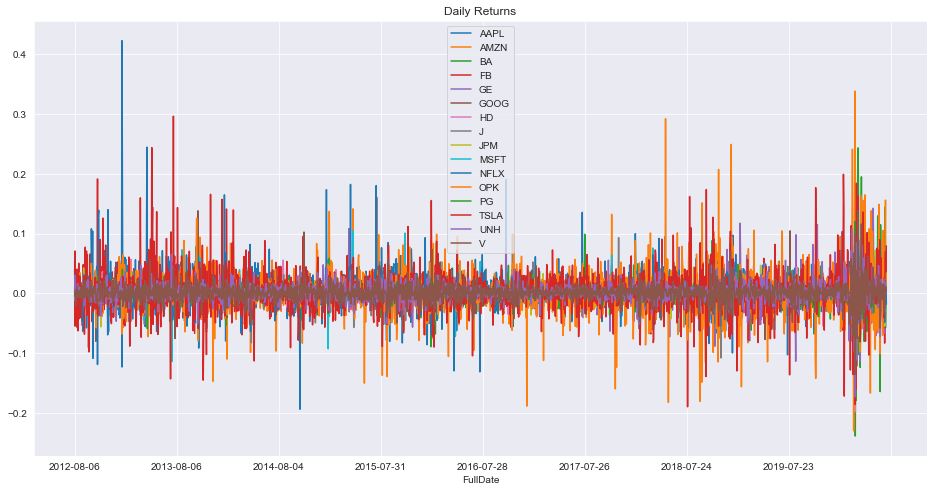

In [21]:
stocks_returns.plot(figsize=(16,8),title='Daily Returns')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

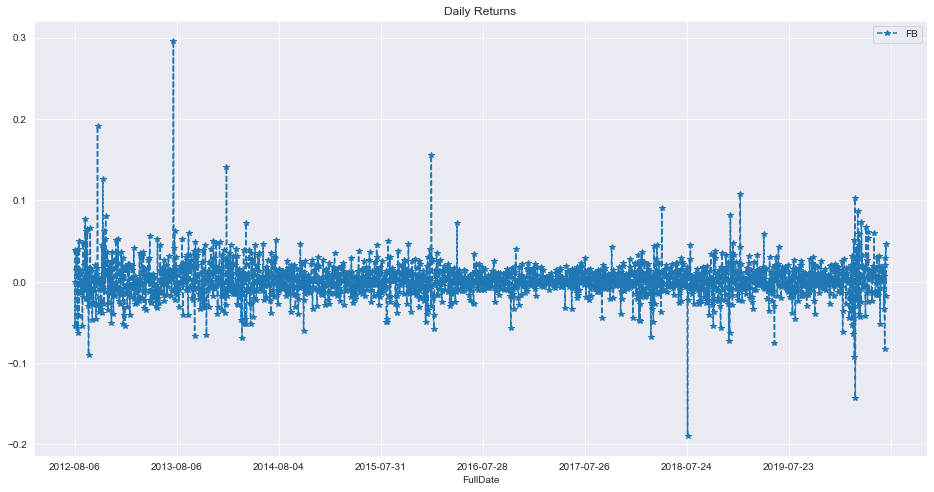

In [22]:
stocks_returns['FB'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='*')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

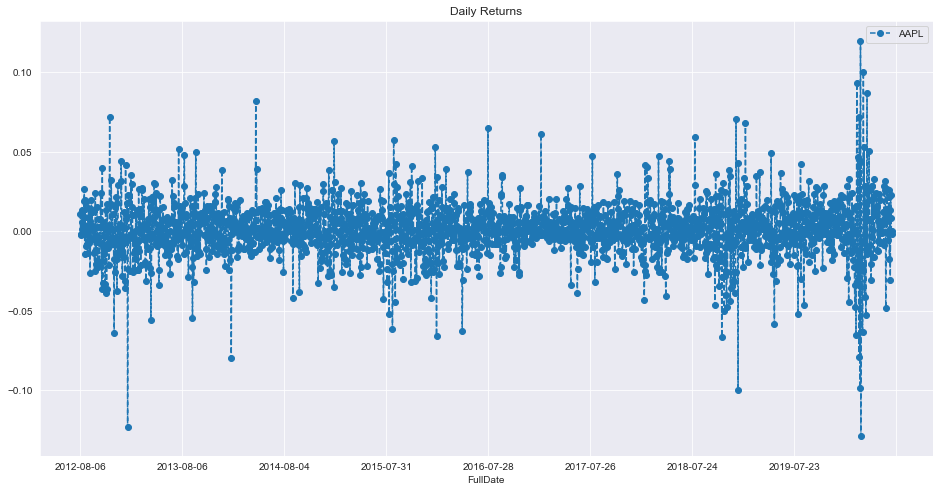

In [23]:
stocks_returns['AAPL'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='o')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

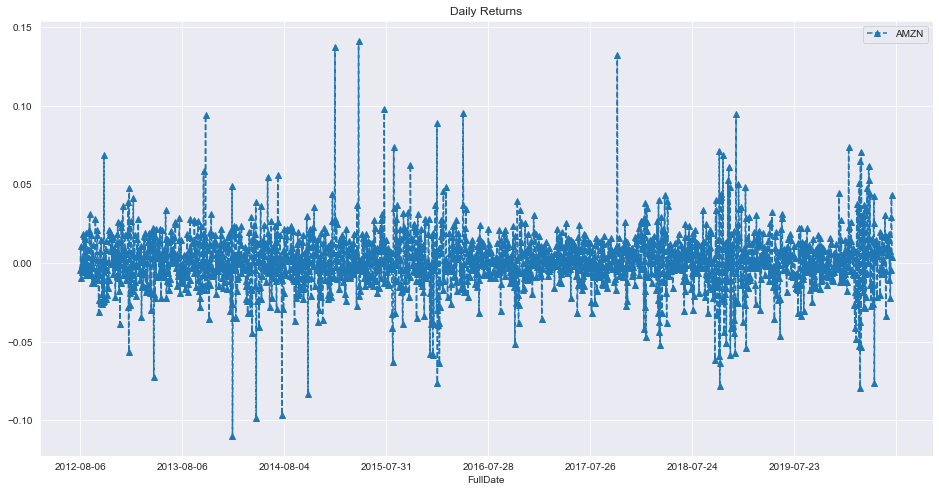

In [24]:
stocks_returns['AMZN'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='^')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

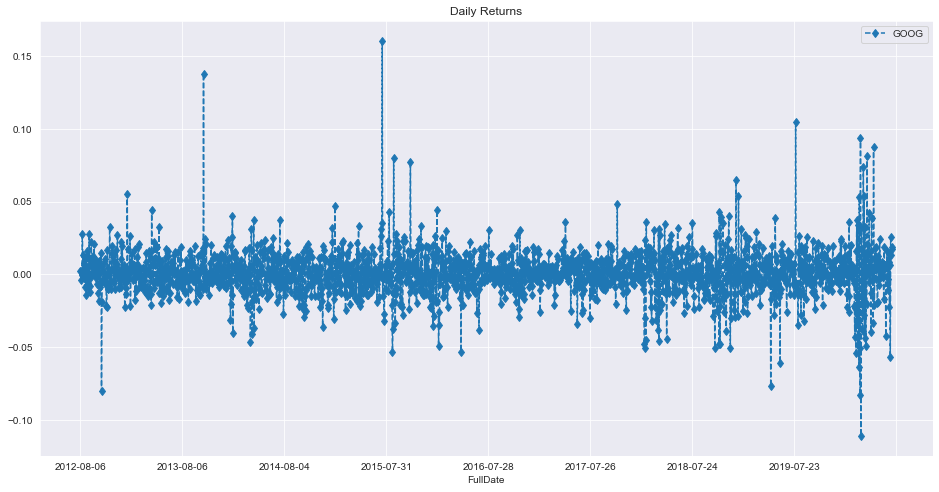

In [25]:
stocks_returns['GOOG'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='d')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

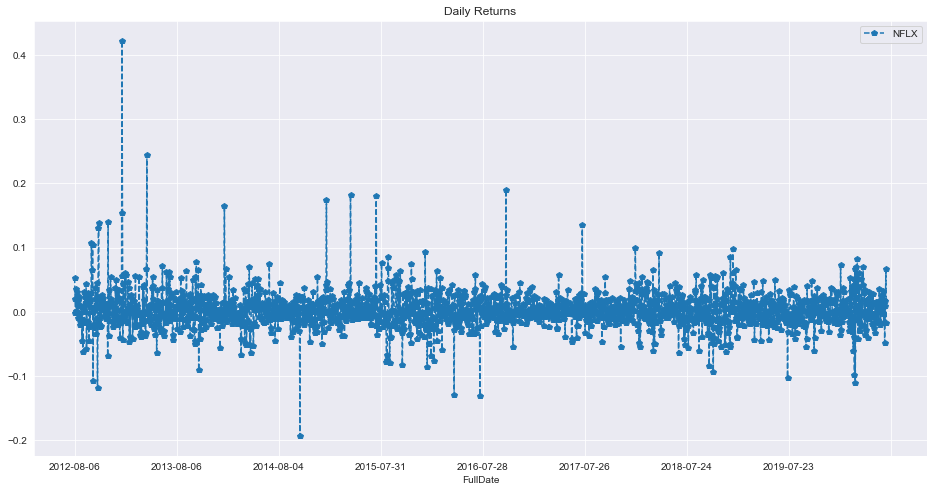

In [26]:
stocks_returns['NFLX'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='p')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

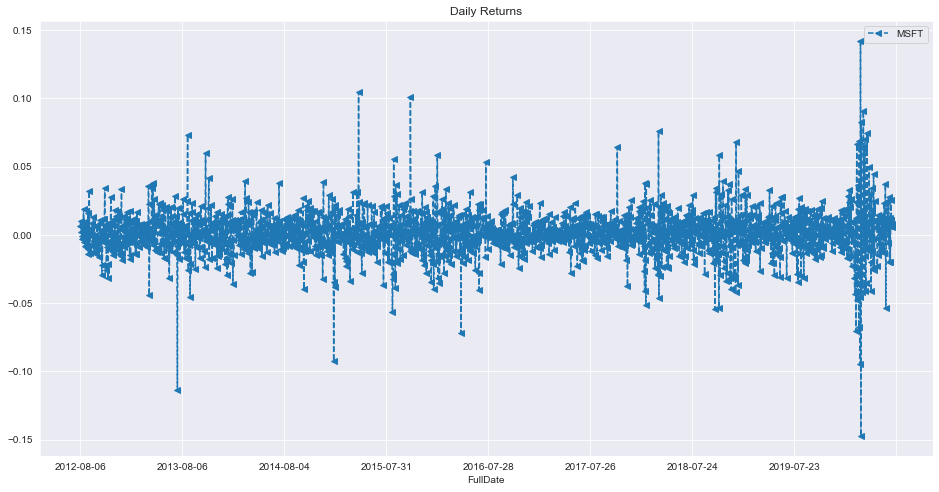

In [27]:
stocks_returns['MSFT'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='<')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

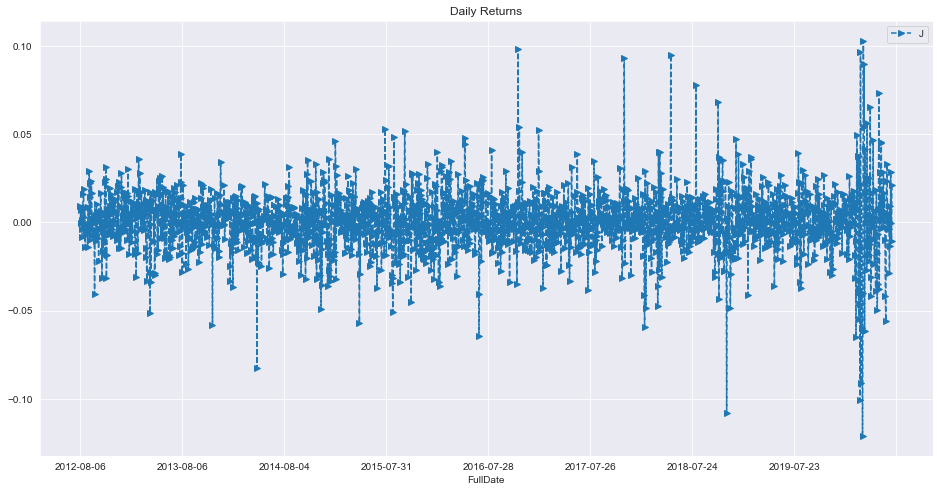

In [28]:
stocks_returns['J'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='>')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

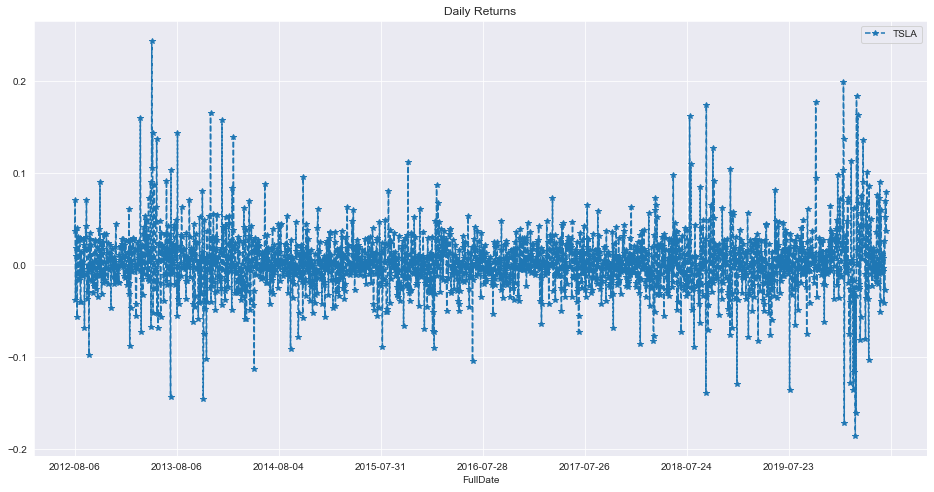

In [29]:
stocks_returns['TSLA'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='*')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

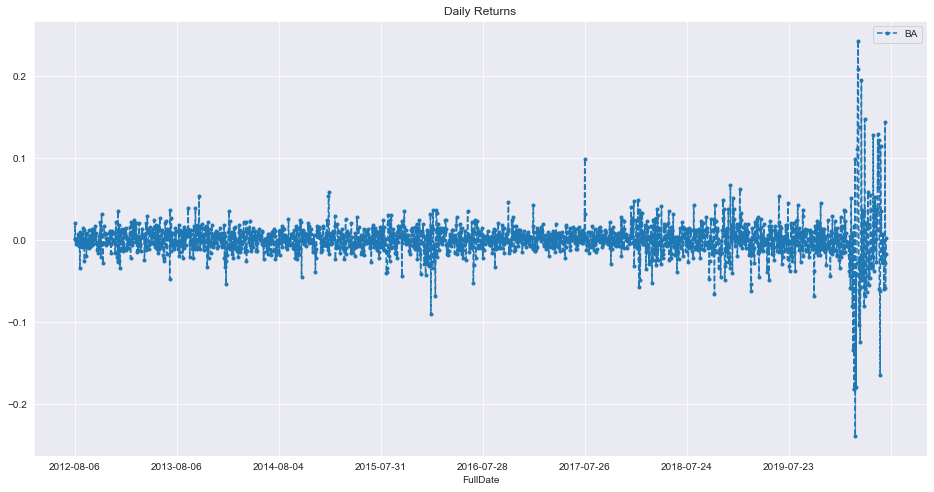

In [30]:
stocks_returns['BA'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='.')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

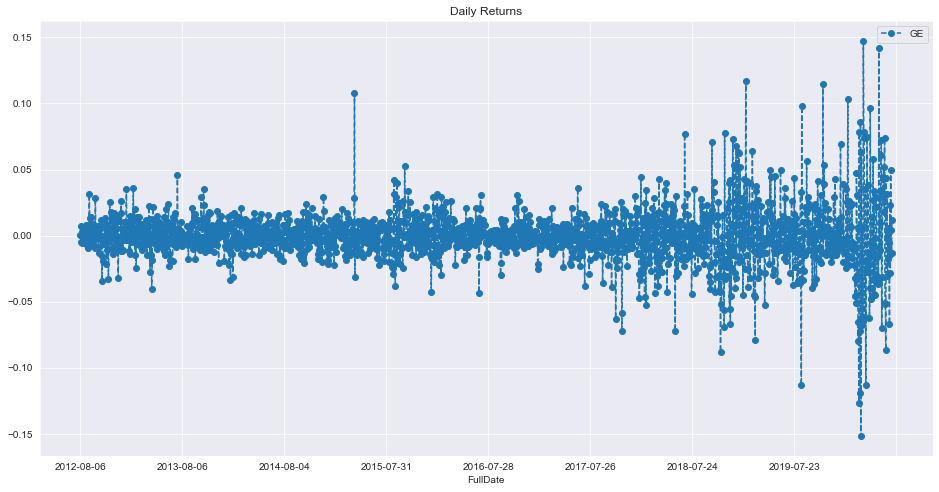

In [31]:
stocks_returns['GE'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='o')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

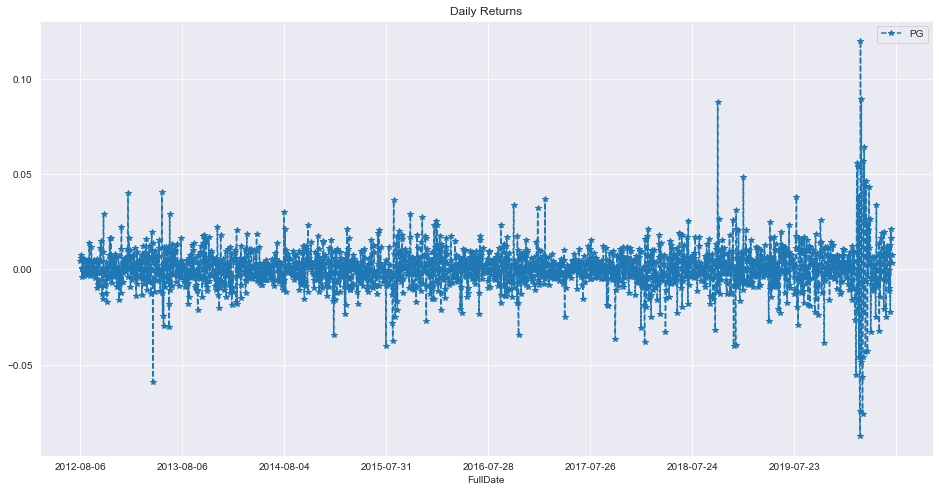

In [32]:
stocks_returns['PG'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='*')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

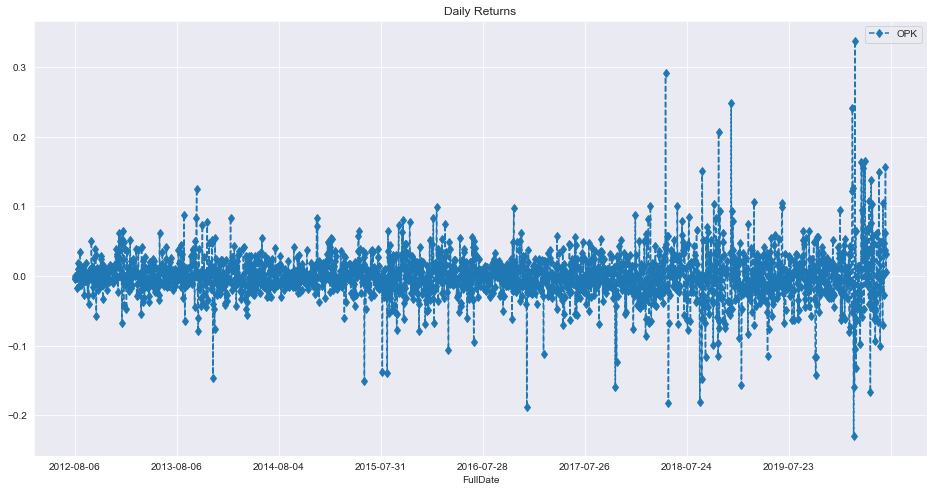

In [33]:
stocks_returns['OPK'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='d')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

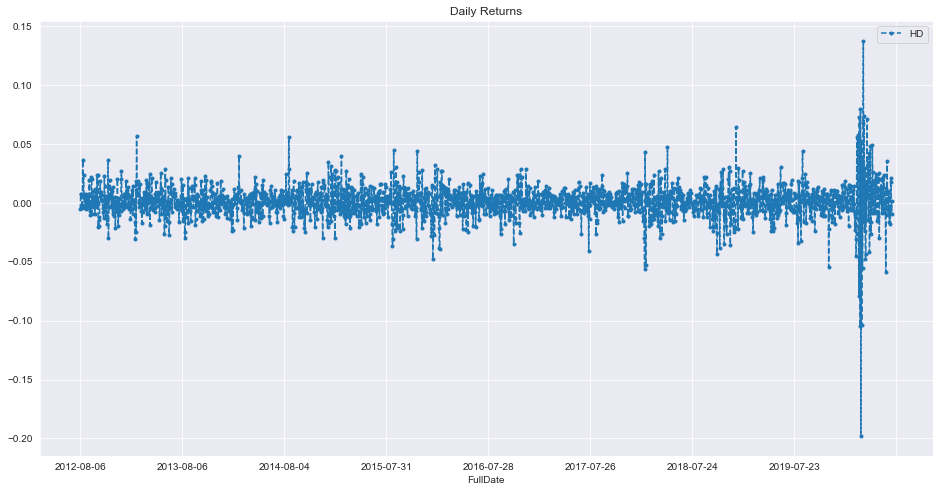

In [34]:
stocks_returns['HD'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='.')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

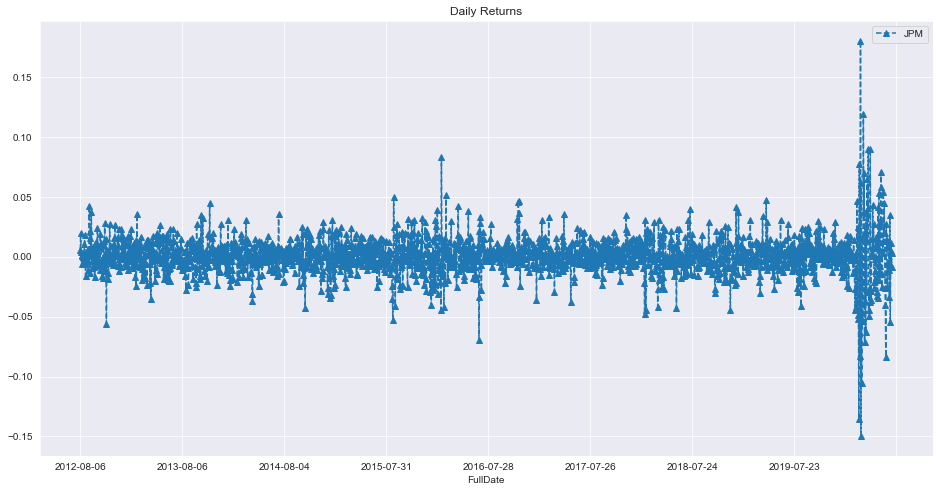

In [35]:
stocks_returns['JPM'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='^')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

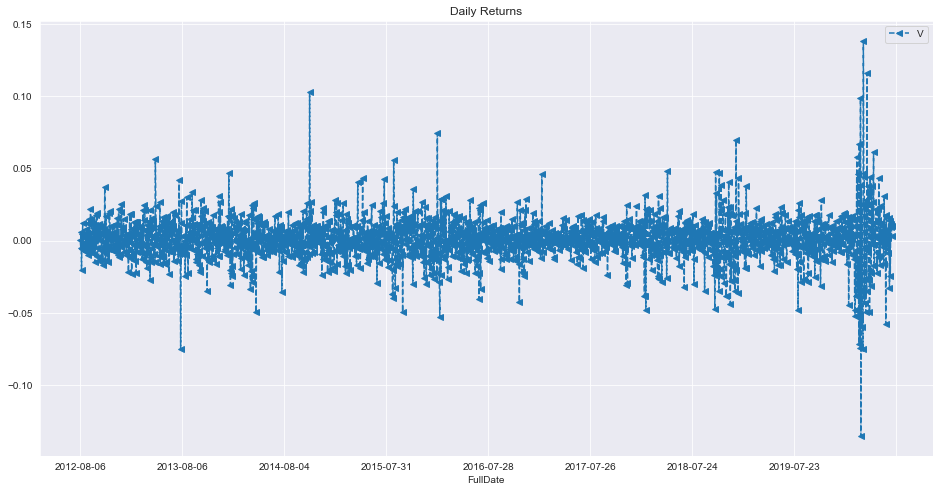

In [36]:
stocks_returns['V'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='<')

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='FullDate'>

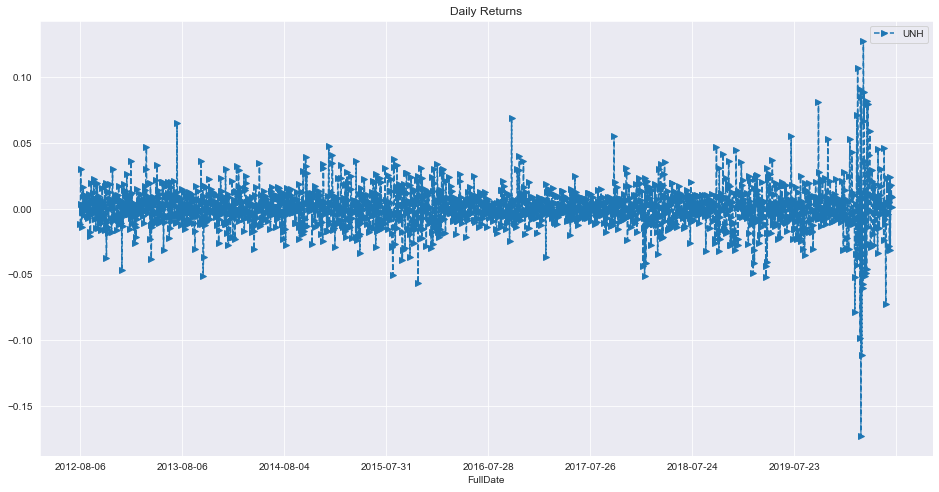

In [37]:
stocks_returns['UNH'].plot(figsize=(16,8),legend=True,title='Daily Returns',linestyle='--',marker='>')

In [38]:
stocks_returns.max()

AAPL    0.119780
AMZN    0.141311
BA      0.243186
FB      0.296115
GE      0.147541
GOOG    0.160524
HD      0.137502
J       0.102854
JPM     0.180185
MSFT    0.142186
NFLX    0.422373
OPK     0.338028
PG      0.120064
TSLA    0.243728
UNH     0.127982
V       0.138423
dtype: float64

In [39]:
stocks_returns.idxmax()

AAPL    2020-03-13
AMZN    2015-04-24
BA      2020-03-25
FB      2013-07-25
GE      2020-03-24
GOOG    2015-07-17
HD      2020-03-24
J       2020-03-24
JPM     2020-03-13
MSFT    2020-03-13
NFLX    2013-01-24
OPK     2020-03-13
PG      2020-03-13
TSLA    2013-05-09
UNH     2020-03-24
V       2020-03-24
dtype: object

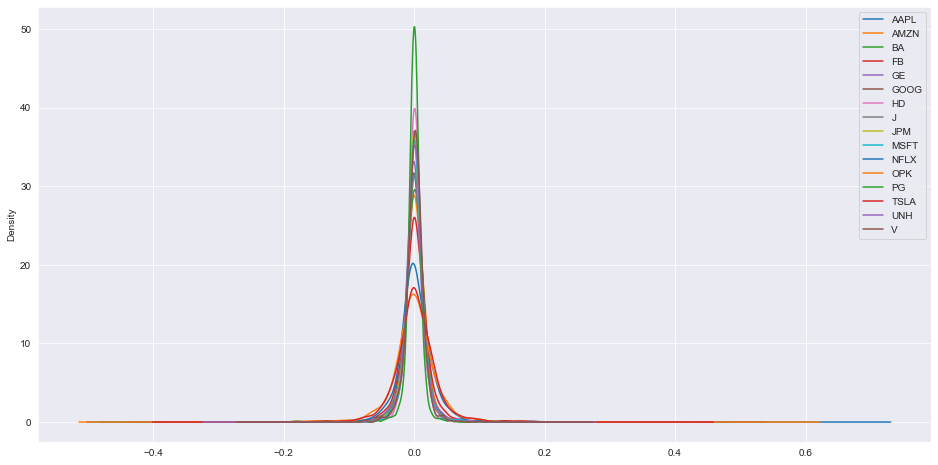

In [40]:
stocks_returns.plot(kind='kde',legend=True,figsize=(16,8))
plt.legend()

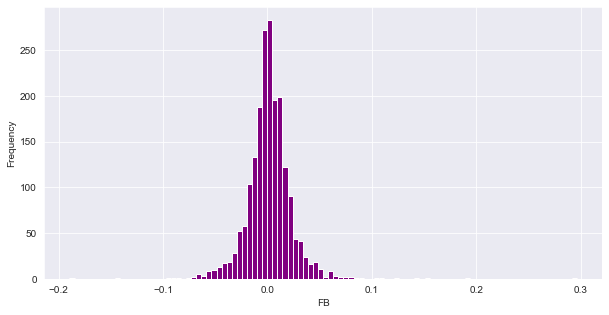

count    1990.000000
mean        0.001464
std         0.022779
min        -0.189609
25%        -0.008904
50%         0.001108
75%         0.011971
max         0.296115
Name: FB, dtype: float64

In [41]:
stocks_returns['FB'].hist(bins = 100, figsize = (10,5),color='purple') 
plt.xlabel('FB')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['FB'].describe()

For the past 8 years the mean of the daily returns for Facebook has been about 0.001464, the fact that is less than 1% shows it has been less volatile over the time range. The highest has been 0.30 toward the positive direction and -0.189609 toward the negative direction. For about 75%, 50% and 25% of the time it was less than 1% with 0.012, 0.001108 and 25%  toward the negative side with -0.008904

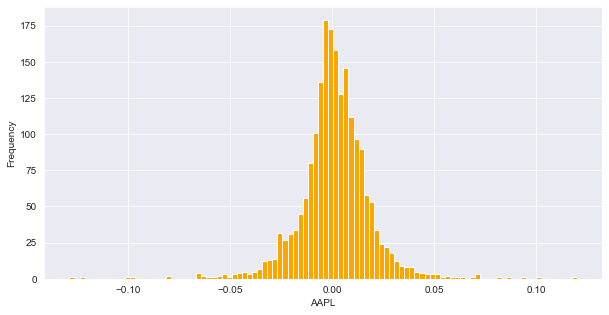

count    1990.000000
mean        0.000941
std         0.017530
min        -0.128650
25%        -0.006831
50%         0.000757
75%         0.009703
max         0.119780
Name: AAPL, dtype: float64

In [42]:
stocks_returns['AAPL'].hist(bins = 100, figsize = (10,5),color='orange') 
plt.xlabel('AAPL')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['AAPL'].describe()

For Apple, the mean of the daily returns has been about 0.000941 for the time range; less than 1% shows it has been less volatile. The highest has been 0.12 toward the positive direction and -0.128650 toward the negative direction. For about 75% to 25% of the time, it was less than 1% with 0.009703, 0.000757 and 25%  toward the negative side with -0.006831.

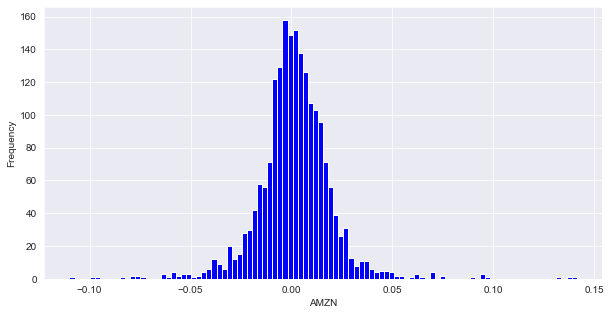

count    1990.000000
mean        0.001440
std         0.018896
min        -0.109972
25%        -0.007447
50%         0.001174
75%         0.010866
max         0.141311
Name: AMZN, dtype: float64

In [43]:
stocks_returns['AMZN'].hist(bins = 100, figsize = (10,5),color='blue') 
plt.xlabel('AMZN')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['AMZN'].describe()

The mean of the daily returns for Amazon has been about0.001440 for the time range collected; it shows it has been less than 1% volatile. The highest was  0.141311 toward the positive direction and -0.109972 toward the negative direction. For about 75% to 25% of the time, it was less than 1% with 0.010866, 0.001174 and 25%  toward the negative side with -0.007447.

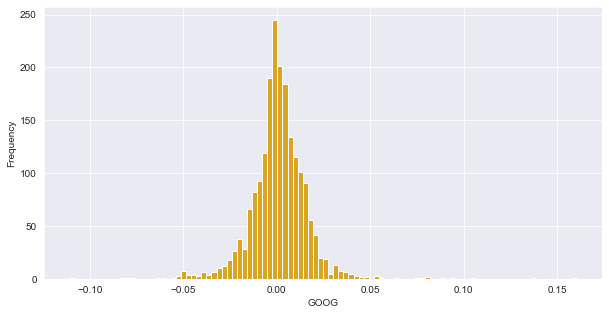

count    1990.000000
mean        0.000892
std         0.015942
min        -0.111008
25%        -0.006083
50%         0.000620
75%         0.008546
max         0.160524
Name: GOOG, dtype: float64

In [44]:
stocks_returns['GOOG'].hist(bins = 100, figsize = (10,5),color='goldenrod') 
plt.xlabel('GOOG')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['GOOG'].describe()

Google's daily returns means was  0.000892 for the time period, and it was also  less than 1% volatile over the time period. 0.160524 was the  highest toward the positive direction and the negative direction side was -0.111008. For about 75% to 25% of the time, it was less than 1% with 0.008546, 0.000620 and 25% of time was -0.006083 toward the negative side.

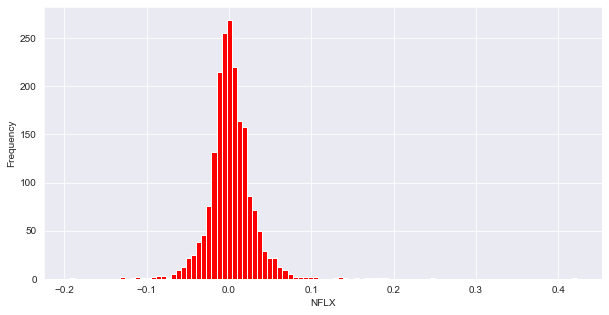

count    1990.000000
mean        0.002500
std         0.029656
min        -0.193664
25%        -0.011451
50%         0.000633
75%         0.015457
max         0.422373
Name: NFLX, dtype: float64

In [45]:
stocks_returns['NFLX'].hist(bins = 100, figsize = (10,5),color='red') 
plt.xlabel('NFLX')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['NFLX'].describe()

Netflix's daily returns means was 0.002500 for the time period, and it was also less than 1% volatile over the time period. 0.422373 was the highest toward the positive direction, and the negative direction side was -0.193664. For about 75% to 25% of the time, it was less than 1% with  0.015457,  0.000633 and 25% of the time were -0.011451 toward the negative side.

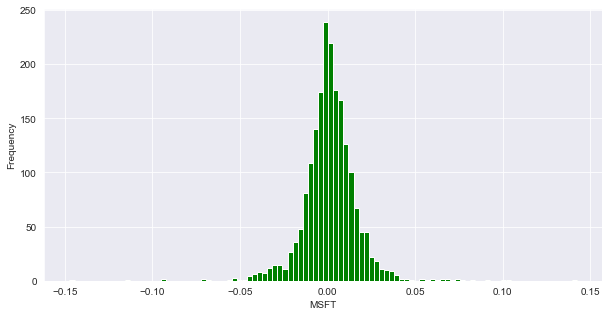

count    1990.000000
mean        0.001199
std         0.016313
min        -0.147396
25%        -0.006109
50%         0.000861
75%         0.008594
max         0.142186
Name: MSFT, dtype: float64

In [46]:
stocks_returns['MSFT'].hist(bins = 100, figsize = (10,5),color='green') 
plt.xlabel('MSFT')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['MSFT'].describe()

The mean of the daily returns for Microsoft was 0.001199 for the eight-years period collected; it been less than 1% volatile for the time range. The highest was 0.008594 in a positive direction and -0.147396 in a negative direction. For about 75% to 25% of the time, it was less than 1% with 0.008594, 0.000861 and 25% toward the negative side with -0.006109.

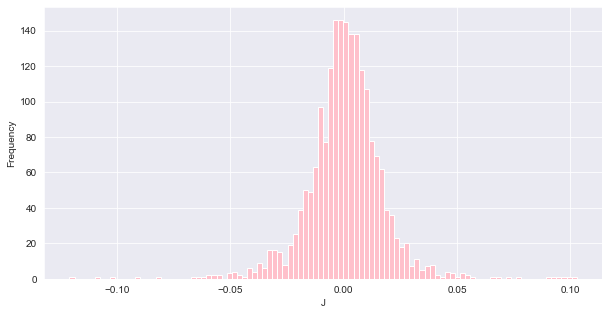

count    1990.000000
mean        0.000558
std         0.017057
min        -0.121065
25%        -0.007755
50%         0.000768
75%         0.009101
max         0.102854
Name: J, dtype: float64

In [47]:
stocks_returns['J'].hist(bins = 100, figsize = (10,5),color='pink') 
plt.xlabel('J')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['J'].describe()

For Jacobs Engineering Group, shows less than 1% of volatile over the time period with a mean of 0.000558. 0.102854 was the highest in a positive direction and -0.121065 in the negative. 75% and 50% of the time, it was 0.009101 and 0.000768, which is less than 1%. 25% of the time, it went toward the negative direction with -0.007755.

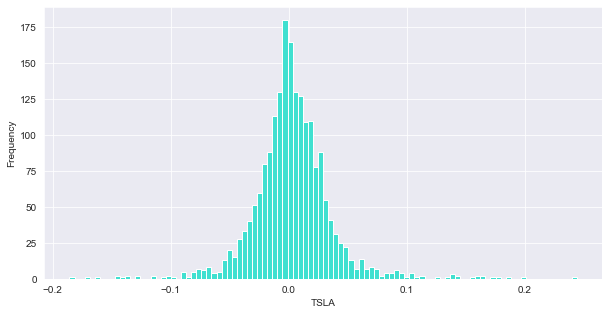

count    1990.000000
mean        0.002473
std         0.033804
min        -0.185785
25%        -0.013291
50%         0.001262
75%         0.018123
max         0.243728
Name: TSLA, dtype: float64

In [48]:
stocks_returns['TSLA'].hist(bins = 100, figsize = (10,5),color='turquoise') 
plt.xlabel('TSLA')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['TSLA'].describe()

Tesla's daily returns means was  0.002473, and it was also  less than 1% volatile over the time period. 0.243728 was the  highest toward the positive direction and the negative direction side was -0.185785. For about 75% to 25% of the time, it was less than 1% with 0.018123, 0.001262 and 25% of time was -0.185785 toward the negative side.

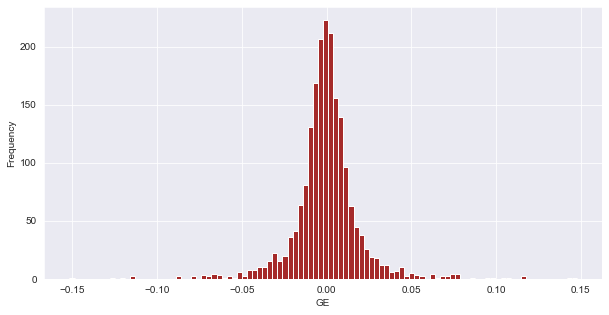

count    1990.000000
mean       -0.000224
std         0.020203
min        -0.151786
25%        -0.008022
50%        -0.000367
75%         0.007523
max         0.147541
Name: GE, dtype: float64

In [49]:
stocks_returns['GE'].hist(bins = 100, figsize = (10,5),color='brown') 
plt.xlabel('GE')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['GE'].describe()

The mean of the daily returns for General Electric Company has been about -0.000224 for the time range collected; it shows it has been less than 1% volatile. The highest was 0.147541 toward the positive direction and -0.151786 toward the negative direction. For about 75% of the time, it was less than 1% with 0.007523, 50% and 25% toward the opposite side with -0.000367 and -0.008022.

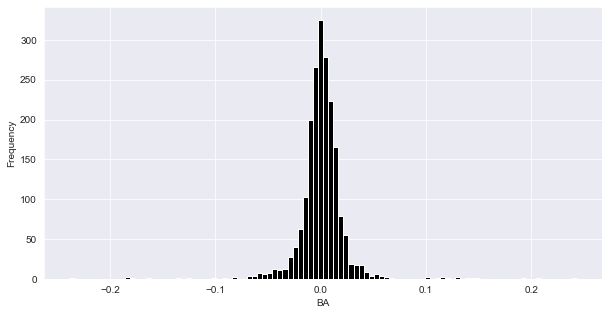

count    1990.000000
mean        0.000822
std         0.023008
min        -0.238484
25%        -0.007469
50%         0.001032
75%         0.009692
max         0.243186
Name: BA, dtype: float64

In [50]:
stocks_returns['BA'].hist(bins = 100, figsize = (10,5),color='black') 
plt.xlabel('BA')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['BA'].describe()

The Boeing Company has less than 1% of volatile with a mean of 0.000822. The highest was 0.243186 in a positive direction and -0.238484 in the opposite. 75% and 50% of the time, it was 0.009692 and 0.001032, which is less than 1%. 25% it was -0.238484 toward the negative direction.

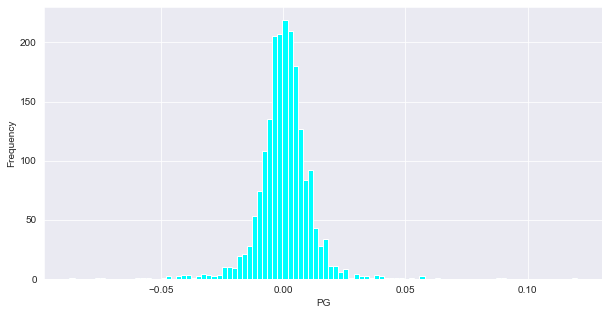

count    1990.000000
mean        0.000494
std         0.011469
min        -0.087418
25%        -0.004460
50%         0.000496
75%         0.005600
max         0.120064
Name: PG, dtype: float64

In [51]:
stocks_returns['PG'].hist(bins = 100, figsize = (10,5),color='aqua') 
plt.xlabel('PG')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['PG'].describe()

The Procter & Gamble Company's means was 0.000494, which is also less than 1% of volatile over the eight years. 0.120064 was the highest toward the positive direction, and the negative side was -0.087418. For about 75% to 25% of the time, it was less than 1% with 0.005600, 0.000496 and 25% of the time were -0.087418 toward the opposite.

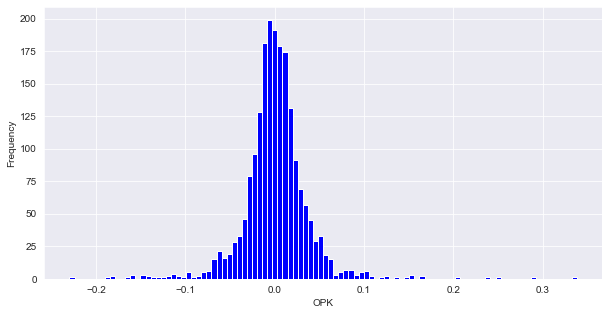

count    1990.000000
mean        0.000575
std         0.036773
min        -0.229730
25%        -0.014678
50%         0.000000
75%         0.016259
max         0.338028
Name: OPK, dtype: float64

In [52]:
stocks_returns['OPK'].hist(bins = 100, figsize = (10,5),color='blue') 
plt.xlabel('OPK')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['OPK'].describe()

For OPKO Health, the mean was 0.000575 for the period and showed less than 1% volatile. The highest was 0.338028 toward the positive direction and -0.229730 toward the negative direction. For about 75% to 25% of the time, it was less than 1% with 0.016259 and 0.000000, and 25% toward the opposite side with -0.014678.

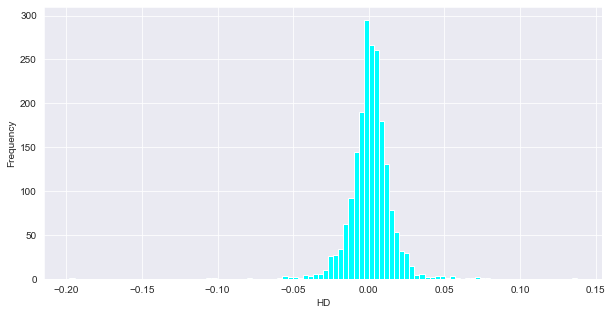

count    1990.000000
mean        0.000979
std         0.014482
min        -0.197955
25%        -0.005135
50%         0.000967
75%         0.007401
max         0.137502
Name: HD, dtype: float64

In [53]:
stocks_returns['HD'].hist(bins = 100, figsize = (10,5),color='aqua') 
plt.xlabel('HD')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['HD'].describe()

The Home Depot shows less than 1% volatile with a mean of the daily returns 0.000979 for the time range. The highest it has is 0.137502 toward the positive direction and -0.197955 toward the negative direction. For about 75% to 25% of the time, it was less than 1% with 0.007401, 0.000967 and 25% toward the opposite side with -0.005135.

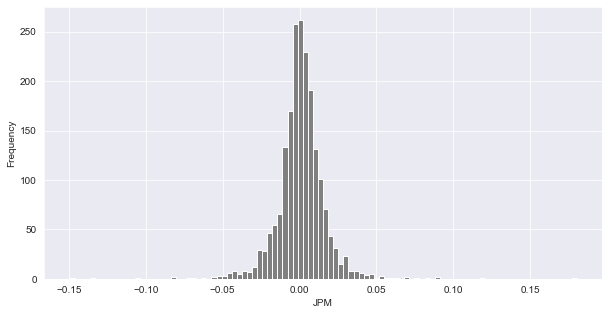

count    1990.000000
mean        0.000724
std         0.016530
min        -0.149632
25%        -0.006224
50%         0.000619
75%         0.008021
max         0.180185
Name: JPM, dtype: float64

In [54]:
stocks_returns['JPM'].hist(bins = 100, figsize = (10,5),color='gray') 
plt.xlabel('JPM')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['JPM'].describe()

JPMorgan Chase & Co also shows less than 1% volatile with a mean of 0.000724. The highest it has moved toward the positive direction is 0.180185 and -0.149632 for the negative direction. For about 75% to 25% of the time, it was less than 1% with 0.008021, 0.000619 and 25% toward the opposite side with -0.006224.

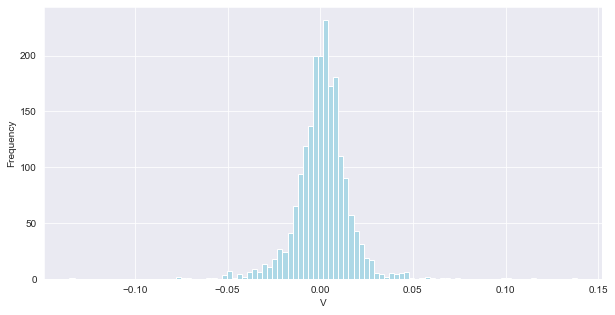

count    1990.000000
mean        0.001044
std         0.015233
min        -0.135448
25%        -0.005743
50%         0.001504
75%         0.008328
max         0.138423
Name: V, dtype: float64

In [55]:
stocks_returns['V'].hist(bins = 100, figsize = (10,5),color='lightblue') 
plt.xlabel('V')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['V'].describe()

Visa's daily returns means was 0.001044, with less than 1% volatile. The highest was  0.138423 toward the positive direction, and the negative direction side was -0.135448. For about 75% to 25% of the time, it was less than 1% with 0.008328, 0.001504 and 25% of the time was -0.005743 toward the negative side.

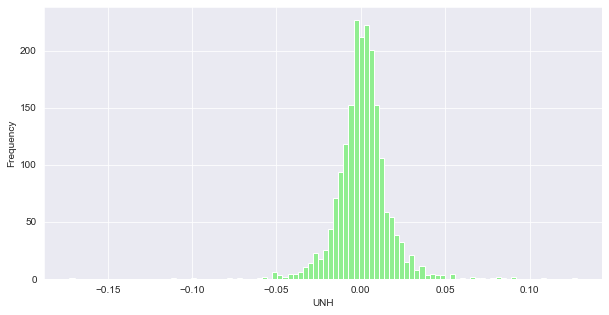

count    1990.000000
mean        0.001081
std         0.016250
min        -0.172746
25%        -0.006459
50%         0.001041
75%         0.008331
max         0.127982
Name: UNH, dtype: float64

In [56]:
stocks_returns['UNH'].hist(bins = 100, figsize = (10,5),color='lightgreen') 
plt.xlabel('UNH')
plt.ylabel('Frequency')
plt.show()
#satistics
stocks_returns['UNH'].describe()

The mean of UnitedHealth Group Incorporated was  0.001081, and for most of the time range, it has been less than 1% means that it was less volatile. The most significant % change in a positive direction was 0.127982 and was -0.172746 in the negative direction.  For about 75% to 25% of the time, it was less than 1% with 0.008331, 0.001041 and 25% toward the opposite side with -0.006459.

## Skewness


Skewness measures how asymmetry the distribution. Normally, a negative skew means that there are more negative returns than expected if the returns were distributed like the normal distribution.
With a normal distribution, the mean and the median are very close.
However,  in negatively skewed, the mean is less than the median and positively skewed,  the mean is greater than the median. 

In [57]:
# is the mean greater than the median?
pd.concat([stocks_returns.mean(), stocks_returns.median(), stocks_returns.mean()>stocks_returns.median()], axis="columns")

0         1      2
AAPL  0.000941  0.000757   True
AMZN  0.001440  0.001174   True
BA    0.000822  0.001032  False
FB    0.001464  0.001108   True
GE   -0.000224 -0.000367   True
GOOG  0.000892  0.000620   True
HD    0.000979  0.000967   True
J     0.000558  0.000768  False
JPM   0.000724  0.000619   True
MSFT  0.001199  0.000861   True
NFLX  0.002500  0.000633   True
OPK   0.000575  0.000000   True
PG    0.000494  0.000496  False
TSLA  0.002473  0.001262   True
UNH   0.001081  0.001041   True
V     0.001044  0.001504  False

BA, J, PG, and V turned out false meaning  the median is lower than the mean, which means the returns is negatively skewed.

In [58]:
from scipy.stats import skew
skew(stocks_returns)

array([-0.27603423,  0.39241361,  0.20456142,  1.32496612,  0.21422607,
        0.75504155, -1.08388025, -0.09191482,  0.10870518,  0.05167013,
        2.16948877,  0.60334764,  0.45692907,  0.52751429, -0.17293797,
        0.2292187 ])

In [51]:
skew(stocks_returns['FB'])

1.3249661165382864

In [59]:
skew(stocks_returns['AAPL'])

-0.2760342307698258

In [60]:
skew(stocks_returns['J'])

-0.09191482007522772

In [61]:
skew(stocks_returns['AMZN'])

0.3924136112425554

In [62]:
skew(stocks_returns['BA'])

0.204561421973444

In [63]:
skew(stocks_returns['GE'])

0.2142260706120931

In [64]:
skew(stocks_returns['GOOG'])

0.755041554614667

In [65]:
skew(stocks_returns['HD'])

-1.083880248528514

In [66]:
skew(stocks_returns['TSLA'])

0.5275142876883487

In [67]:
skew(stocks_returns['JPM'])

0.10870517732404343

In [68]:
skew(stocks_returns['MSFT'])

0.051670134741904614

In [69]:
skew(stocks_returns['NFLX'])

2.1694887680359836

In [70]:
skew(stocks_returns['OPK'])

0.6033476354653925

In [71]:
skew(stocks_returns['PG'])

0.45692907131199556

In [74]:
skew(stocks_returns['UNH'])

-0.17293796899306932

In [75]:
skew(stocks_returns['V'])

0.2292187030201094

In [33]:
#'AAPL', 'J' ,'AMZN' ,'BA' ,'FB' ,'GE' ,'GOOG' ,'HD' ,'TSLA', 'JPM', 'MSFT' ,'NFLX' ,'OPK', 'PG', 'UNH', 'V'

In [60]:
fun_skewness(stocks_returns).sort_values()

HD     -1.083880
AAPL   -0.276034
UNH    -0.172938
J      -0.091915
MSFT    0.051670
JPM     0.108705
BA      0.204561
GE      0.214226
V       0.229219
AMZN    0.392414
PG      0.456929
TSLA    0.527514
OPK     0.603348
GOOG    0.755042
FB      1.324966
NFLX    2.169489
dtype: float64

## kurtosis

The kurtosis measures the "fatness" of the tails of the distribution. A normal distribution has a kurtosis of 3 and so if the kurtosis of the returns is less than three then it tends to have thinner tails, and if the kurtosis is greater than three, then the distribution has fatter tails.

In [61]:
def fun_kurtosis(ret):
    demeaned_ret = ret - ret.mean()
    sigma_ret = ret.std(ddof=0)
    exp_ret = (demeaned_ret**4).mean()
    return exp_ret/sigma_ret**4

In [62]:
fun_kurtosis(stocks_returns).sort_values()

TSLA     9.667179
J       10.012133
AAPL    10.467946
AMZN    10.873559
GE      13.479757
OPK     14.613387
V       15.245774
MSFT    15.290716
GOOG    16.166043
UNH     17.114378
PG      18.855042
JPM     20.342094
FB      25.489778
HD      30.039330
NFLX    30.615894
BA      32.720309
dtype: float64

All the stocks are Leptokurtic Kurtosis because they are greater than three and shows a heavy tail on either side, which indicates large outliers. In the investment world, a leptokurtic distribution is classified as a high-risk investment.

In [68]:
stocks_returns[stocks_returns>0].std(ddof=0)#the positive semideviation

AAPL    0.012326
AMZN    0.014239
BA      0.018775
FB      0.018658
GE      0.016407
GOOG    0.012439
HD      0.010321
J       0.012087
JPM     0.012569
MSFT    0.012404
NFLX    0.026408
OPK     0.029461
PG      0.008891
TSLA    0.026831
UNH     0.012247
V       0.011255
dtype: float64

In [65]:
stocks_returns[stocks_returns<0].std(ddof=0)#the negative semideviation

AAPL    0.013399
AMZN    0.013488
BA      0.019147
FB      0.015703
GE      0.015391
GOOG    0.011477
HD      0.011909
J       0.012710
JPM     0.012823
MSFT    0.012324
NFLX    0.018239
OPK     0.026789
PG      0.008653
TSLA    0.023085
UNH     0.012282
V       0.011558
dtype: float64

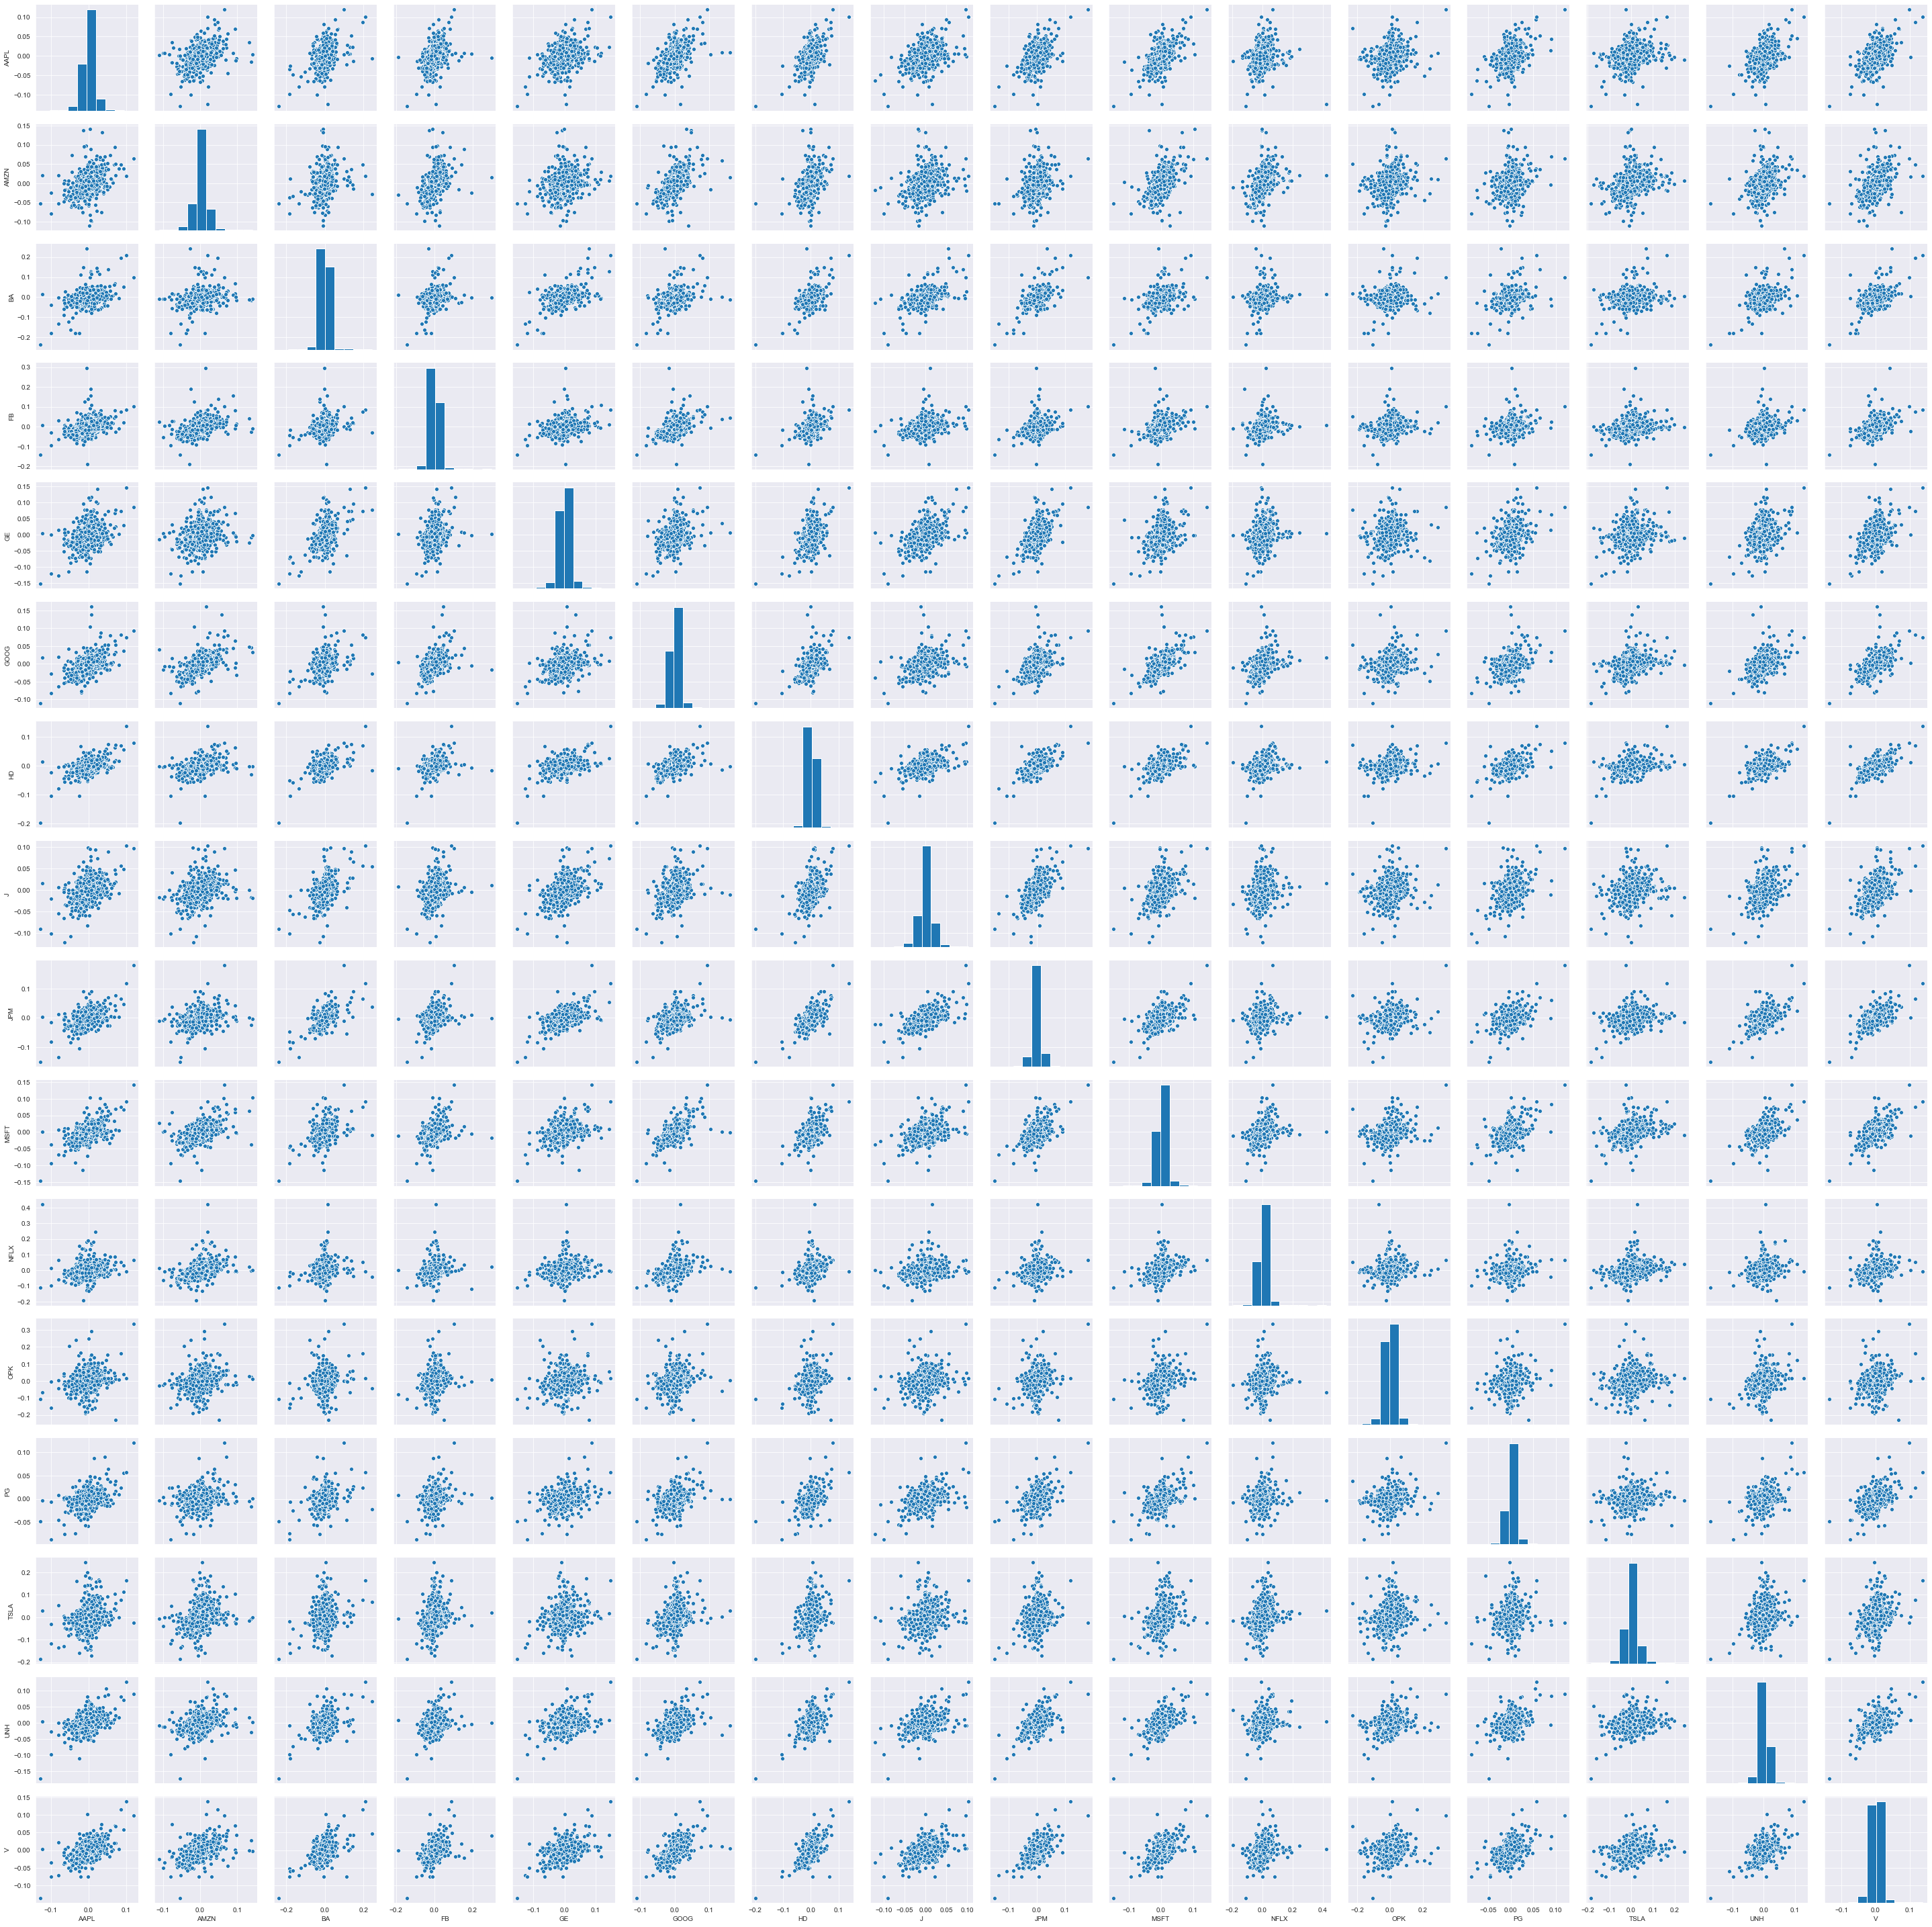

In [104]:
# using pairplot on the DataFrame for  the compariing all
sns.pairplot(stocks_returns.dropna())

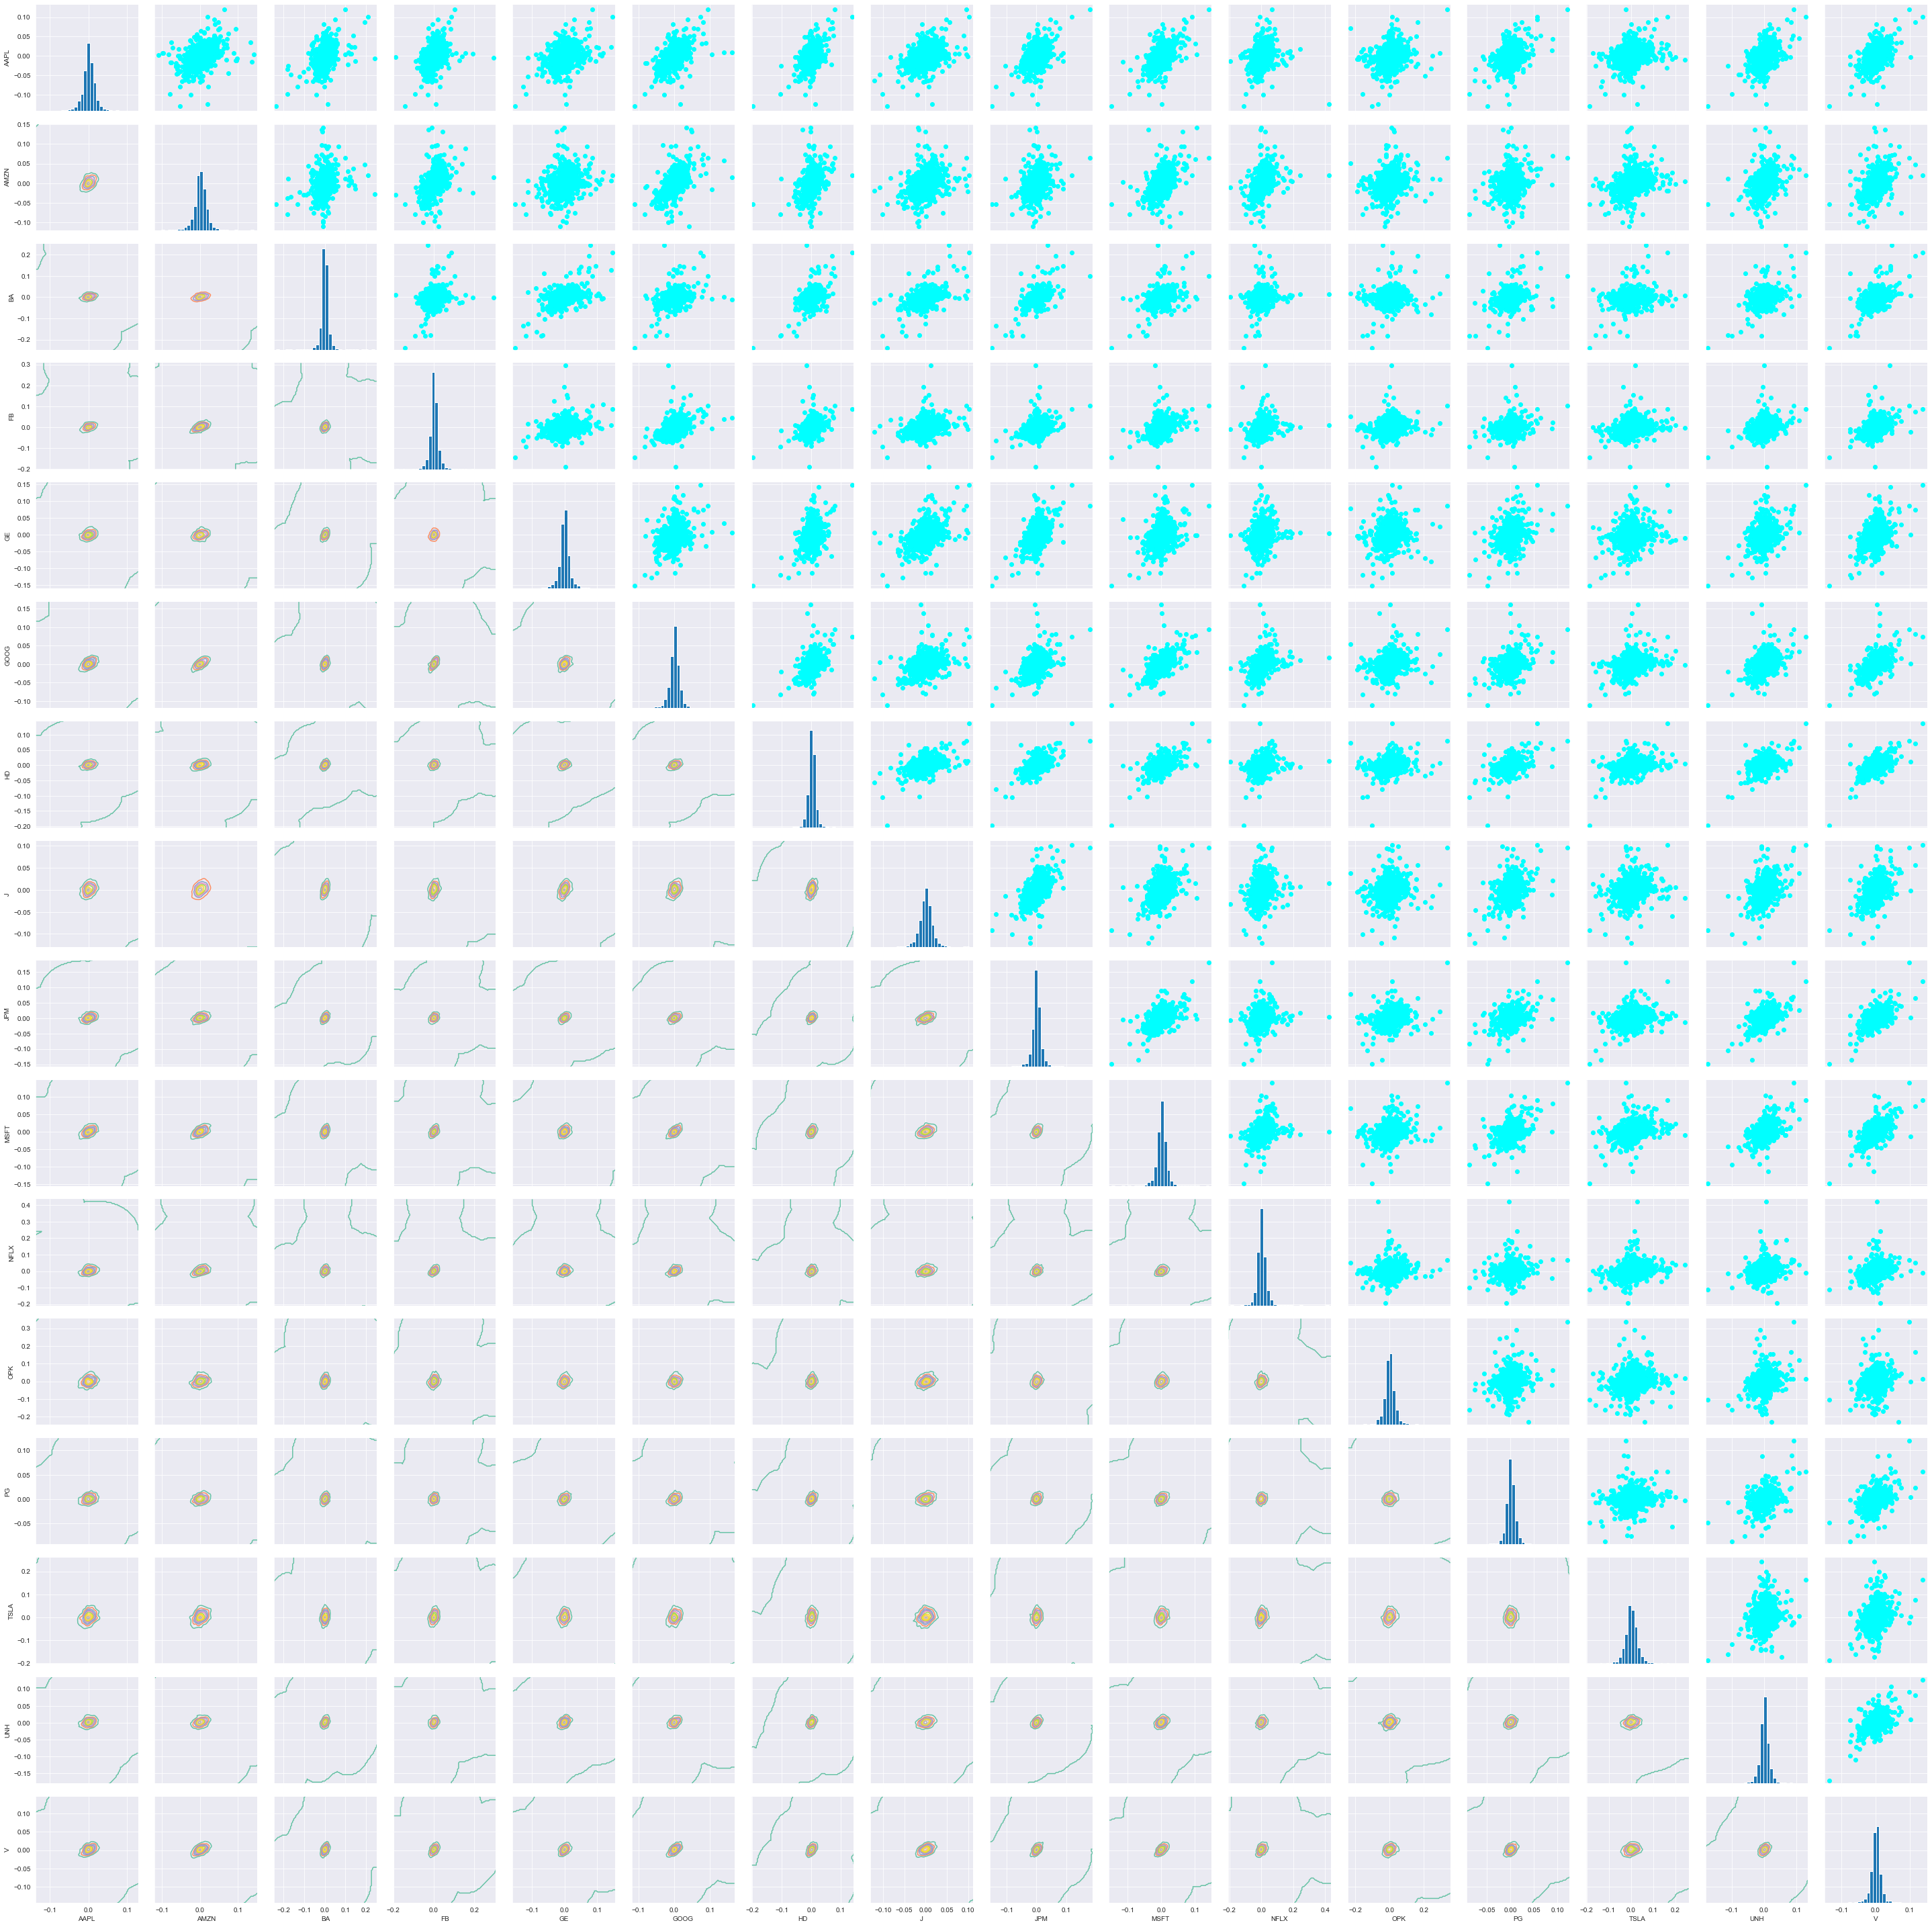

In [105]:
# Setting up the figure by naming it returns_fig and calling PairPLot on the DataFrame
returns_fig = sns.PairGrid(stocks_returns.dropna())

# Using map_upper to specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='aqua')

#  defining triangle in the figure, including the plot type (kde) and the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='Set2')

# defining the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

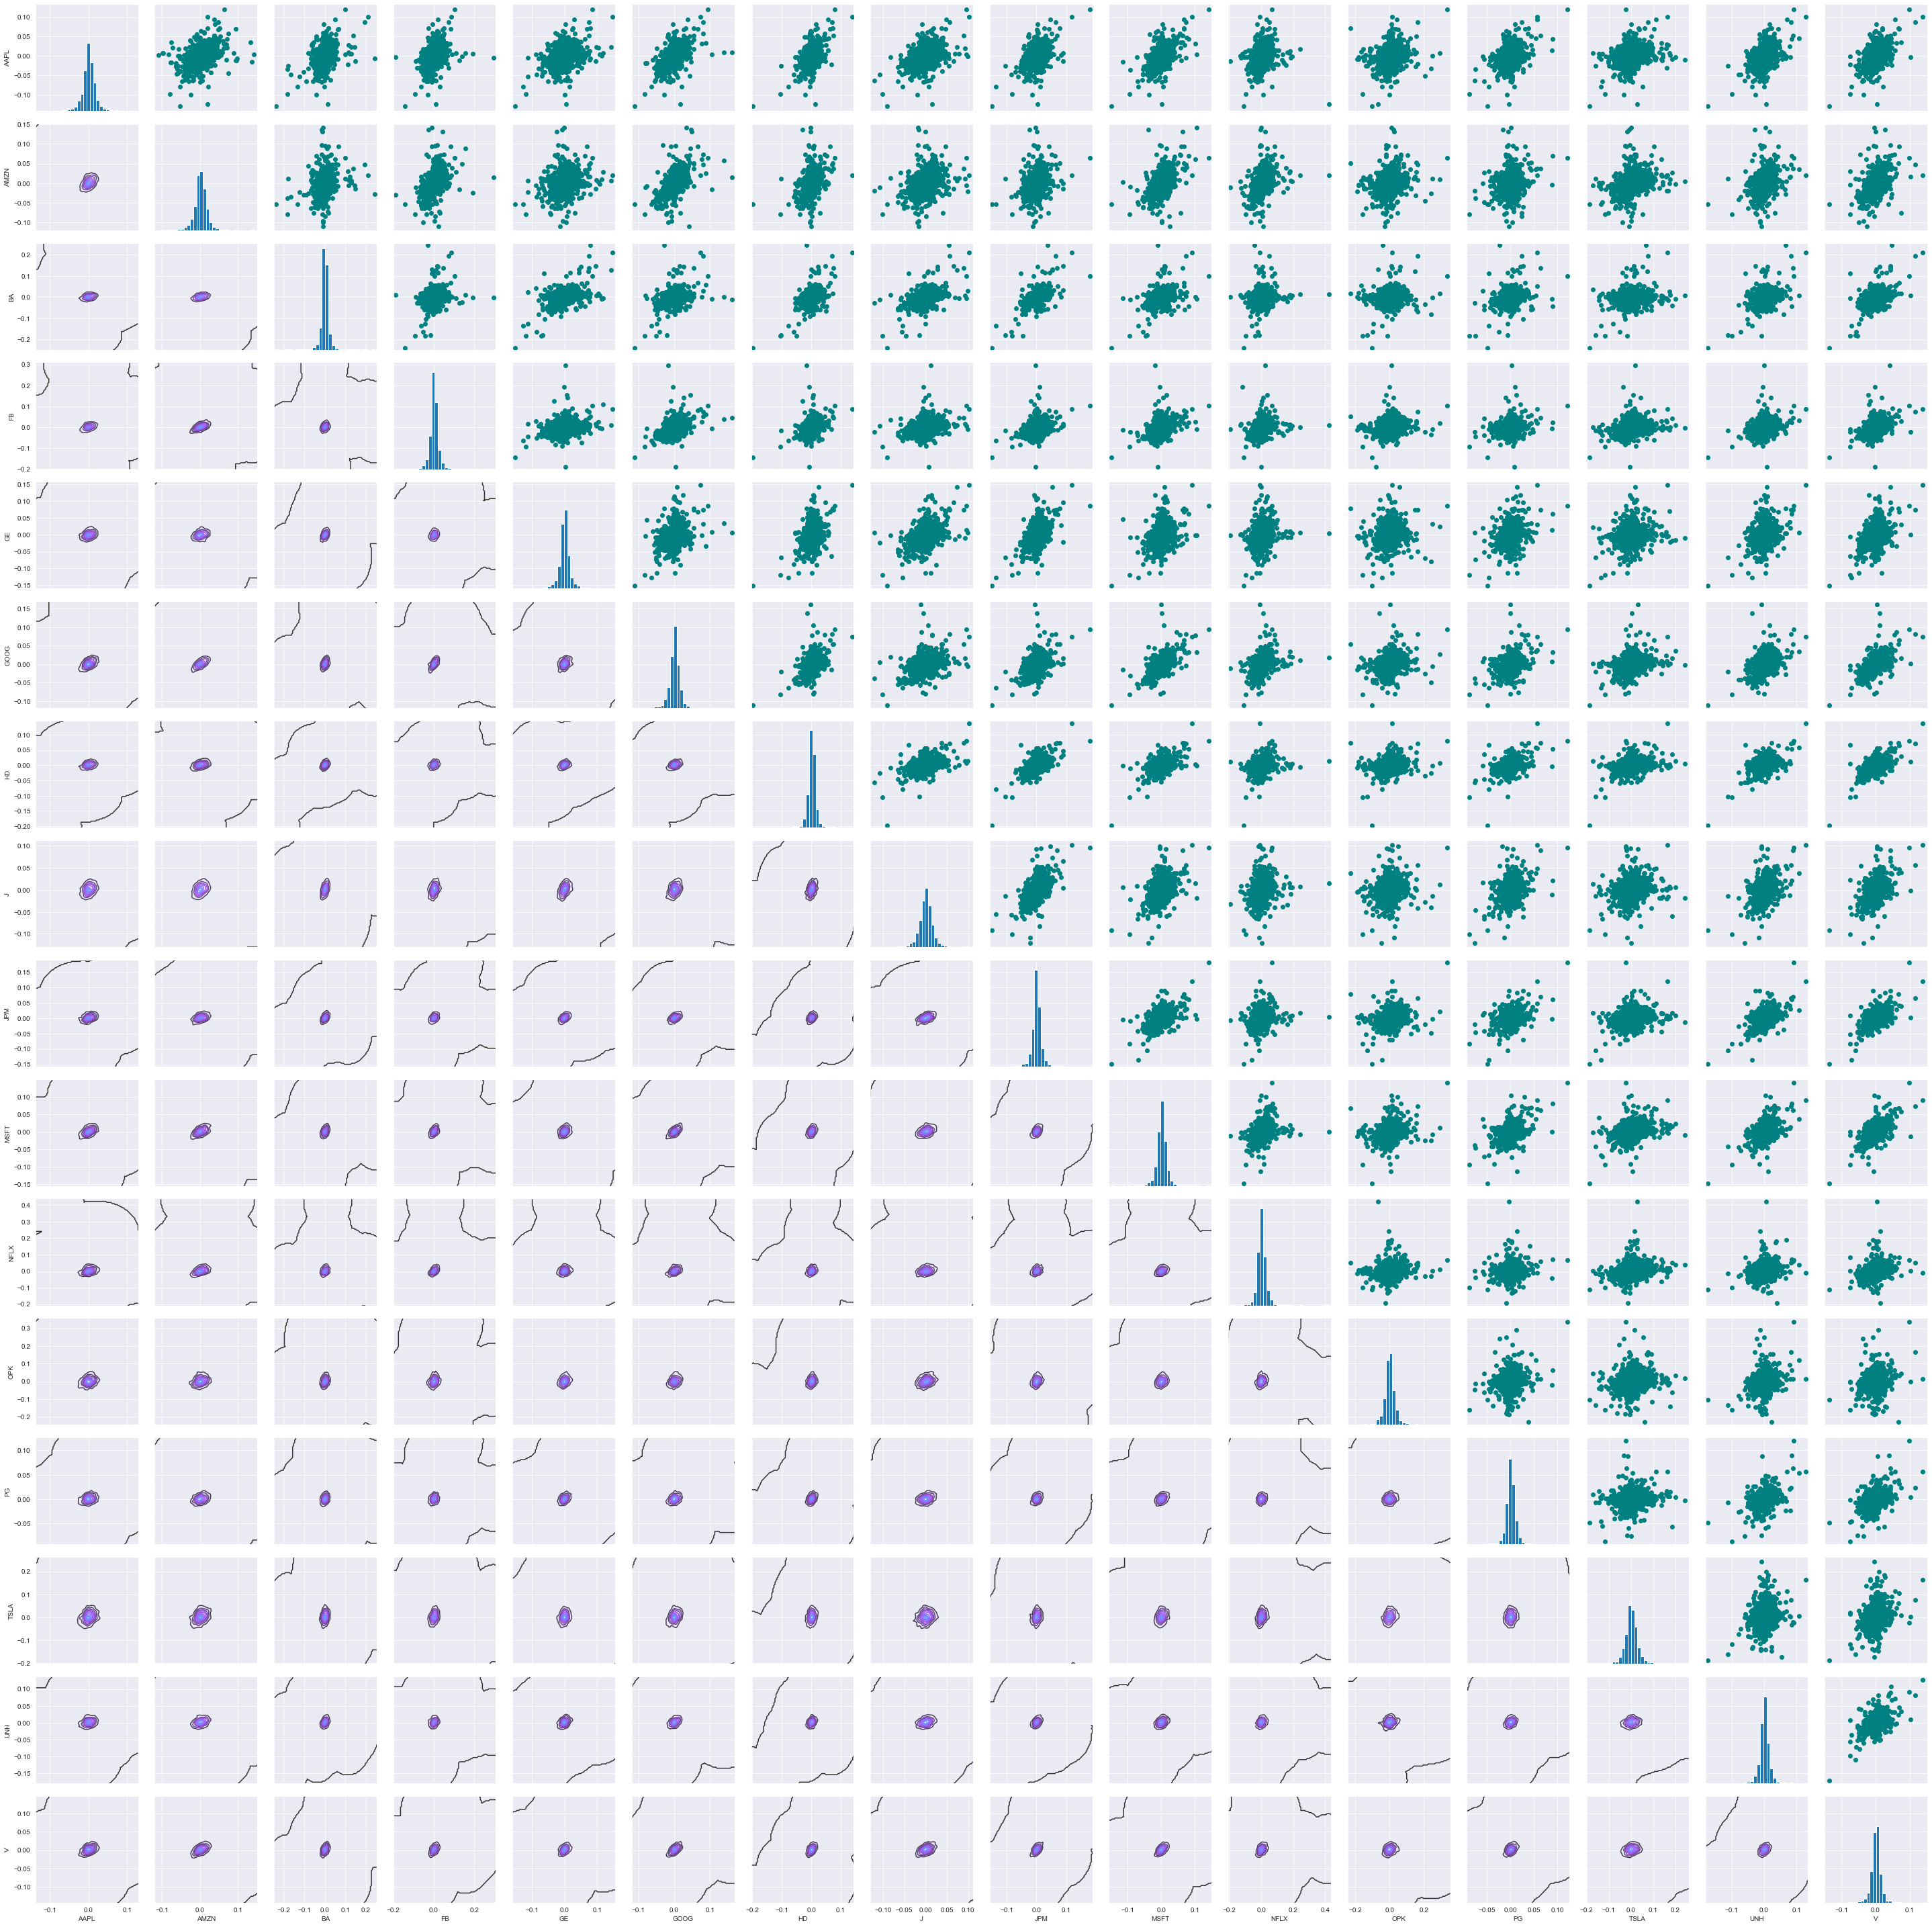

In [106]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(stocks_returns)

# Using map upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='teal')

# defining the lower triangle in the figure, inclufing the plot type (kde) 
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# defining the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

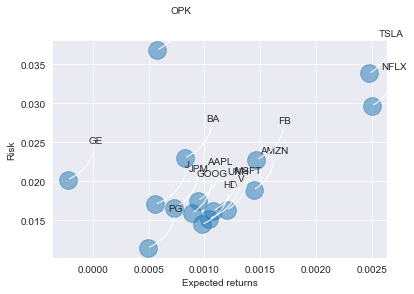

In [48]:
# http://matplotlib.org/users/annotations_guide.html
returns_df = stocks_returns.dropna()

area = np.pi*100

plt.scatter(returns_df.mean(), returns_df.std(),alpha = 0.5,s =area)



#Setting the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')
figsize=(16, 14)

for label, x, y in zip(returns_df.columns, returns_df.mean(), returns_df.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (35,35),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Comparing the expected return with the standard deviation of the daily returns.

In [77]:
import numpy as np
np.percentile(stocks_returns, 5, axis=0)

array([-0.02543869, -0.02657951, -0.02653636, -0.03100188, -0.03001633,
       -0.0222914 , -0.01941149, -0.02675223, -0.02331629, -0.02148343,
       -0.03787828, -0.05190191, -0.01497175, -0.04598327, -0.02234057,
       -0.02219413])

### Using the "bootstrap" method to find the Value at risk

In [79]:
stocks_returns['AAPL'].quantile(0.05)

-0.02543868678280054

Apple has -0.025 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.5% 

In [80]:
stocks_returns['FB'].quantile(0.05)

-0.031001879234888834

Facebook has -0.031 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 3.1%

In [26]:
stocks_returns['AMZN'].quantile(0.05)

-0.026579514171139972

Amazon has -0.026 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.6%

In [27]:
stocks_returns['J'].quantile(0.05)

-0.02675223333471241

Amazon has -0.027 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.7%

In [28]:
stocks_returns['BA'].quantile(0.05)

-0.026536358471606944

The Boeing Company has -0.027 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.7%

In [32]:
stocks_returns['GE'].quantile(0.05)

-0.03001632817470022

General Electric  has -0.030 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 3%

In [34]:
stocks_returns['GOOG'].quantile(0.05)

-0.022291395124079648

Google has -0.022 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.2%

In [35]:
stocks_returns['HD'].quantile(0.05)

-0.019411490420347656

The Home Depot,  has -0.019 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 1.9%

In [37]:
stocks_returns['TSLA'].quantile(0.05)

-0.04598326661356394

Google has -0.046 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 4.6%

In [38]:
stocks_returns['JPM'].quantile(0.05)

-0.023316288730526342

Google has -0.023 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.3%

In [40]:
stocks_returns['MSFT'].quantile(0.05)

-0.021483430024201236

Microsoft has -0.021 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.1%

In [41]:
stocks_returns['NFLX'].quantile(0.05)

-0.037878275550725274

Netflix has -0.038 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 3.8%

In [42]:
stocks_returns['OPK'].quantile(0.05)

-0.051901906881463136

OPKO Health has -0.051 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 3.8%

In [43]:
stocks_returns['PG'].quantile(0.05)

-0.014971747518966565

The Procter & Gamble has -0.015 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 1.5%

In [44]:
stocks_returns['UNH'].quantile(0.05)

-0.022340565287676035

UnitedHealth Group has -0.022 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.2%

In [45]:
stocks_returns['V'].quantile(0.05)

-0.022194132003064422

UnitedHealth Group has -0.022 of value at risk from the daily returns that means that with the 0.05 empirical quantile at 95% confidence, the worst daily loss will not exceed 2.2%


# Maximum Drawdown

A metric of the downside risk of a portfolio, it measures the most extensive peak-to-valley loss (expressed as a percentage) during the investment. The lower the maximum drawdown, the better.

<img src="trough.jpg" style="width:200px;height:200px"/>

In [110]:
def fun_drawdown(rets_series: pd.Series):
    investment = 2000*(1+rets_series).cumprod()
    previousPeaks = investment.cummax()
    drawdowns = (investment - previousPeaks)/previousPeaks
    return pd.DataFrame({"Sock Investment": investment, 
                         "Previous Peak": previousPeaks, 
                         "Max Drawdown": drawdowns})

In [111]:
fun_drawdown(stocks_returns["FB"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2078.710281    2078.710281      0.000000
2012-08-07      1964.912201    2078.710281     -0.054745
2012-08-08      1964.912201    2078.710281     -0.054745

In [112]:
fun_drawdown(stocks_returns["FB"]).min()

Sock Investment    1681.365521
Previous Peak      2078.710281
Max Drawdown         -0.429609
dtype: float64

In [113]:
fun_drawdown(stocks_returns["FB"]).idxmin()

Sock Investment    2012-09-04
Previous Peak      2012-08-06
Max Drawdown       2018-12-24
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

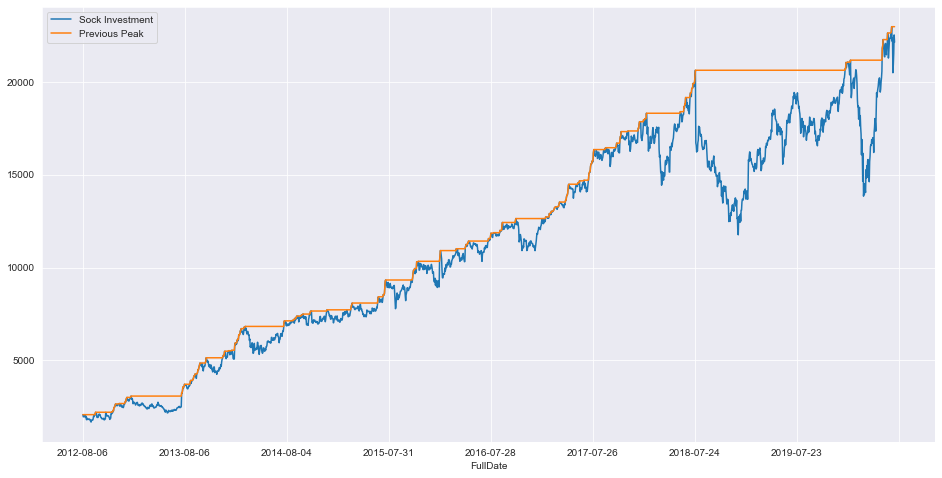

In [114]:
fun_drawdown(stocks_returns["FB"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [115]:
fun_drawdown(stocks_returns["AAPL"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2022.105167    2022.105167      0.000000
2012-08-07      2016.842089    2022.105167     -0.002603
2012-08-08      2013.684122    2022.105167     -0.004164

In [116]:
fun_drawdown(stocks_returns["AAPL"]).min()

Sock Investment    1287.368373
Previous Peak      2022.105167
Max Drawdown         -0.437960
dtype: float64

In [117]:
fun_drawdown(stocks_returns["AAPL"]).idxmin()

Sock Investment    2013-04-19
Previous Peak      2012-08-06
Max Drawdown       2013-04-19
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

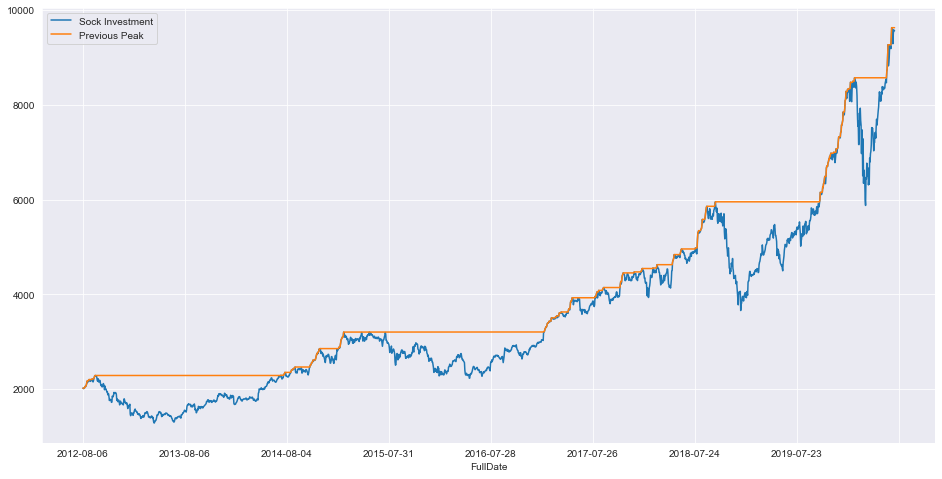

In [118]:
fun_drawdown(stocks_returns["AAPL"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [119]:
fun_drawdown(stocks_returns["AMZN"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      1991.658546    1991.658546      0.000000
2012-08-07      2013.533611    2013.533611      0.000000
2012-08-08      1994.978114    2013.533611     -0.009215

In [120]:
fun_drawdown(stocks_returns["AMZN"]).min()

Sock Investment    1877.686555
Previous Peak      1991.658546
Max Drawdown         -0.341038
dtype: float64

In [121]:
fun_drawdown(stocks_returns["AMZN"]).idxmin()

Sock Investment    2012-11-15
Previous Peak      2012-08-06
Max Drawdown       2018-12-24
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

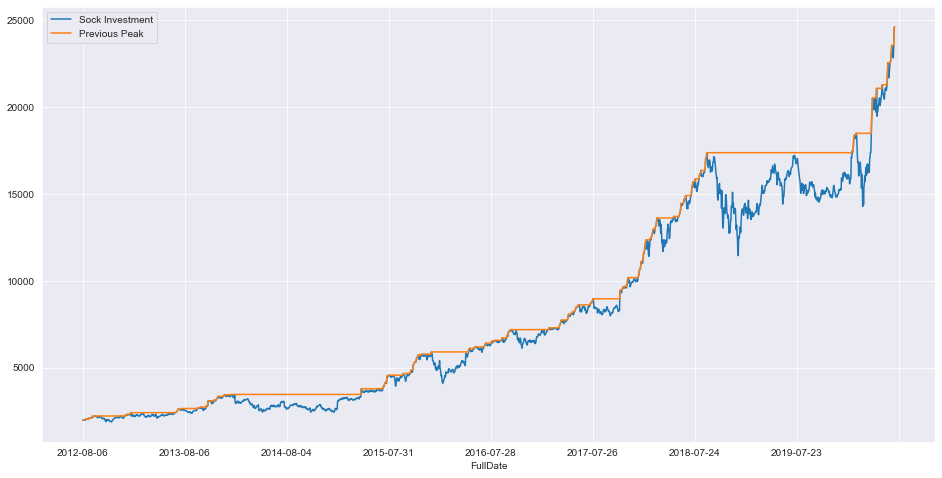

In [122]:
fun_drawdown(stocks_returns["AMZN"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [123]:
fun_drawdown(stocks_returns["GOOG"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2004.632612    2004.632612      0.000000
2012-08-07      1997.495891    2004.632612     -0.003560
2012-08-08      2002.817242    2004.632612     -0.000906

In [124]:
fun_drawdown(stocks_returns["GOOG"]).min()

Sock Investment    1997.495891
Previous Peak      2004.632612
Max Drawdown         -0.307901
dtype: float64

In [125]:
fun_drawdown(stocks_returns["GOOG"]).idxmin()

Sock Investment    2012-08-07
Previous Peak      2012-08-06
Max Drawdown       2020-03-23
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

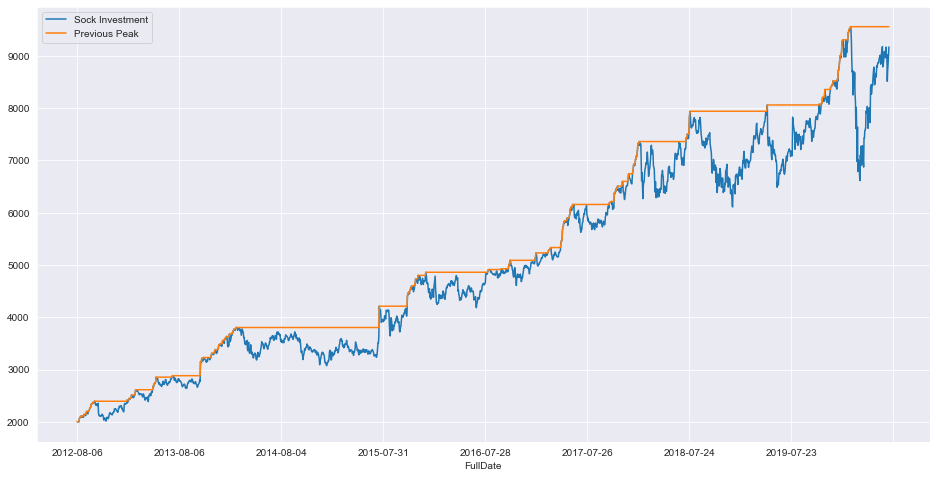

In [126]:
fun_drawdown(stocks_returns["GOOG"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [127]:
fun_drawdown(stocks_returns["NFLX"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2106.493469    2106.493469      0.000000
2012-08-07      2148.052120    2148.052120      0.000000
2012-08-08      2145.454658    2148.052120     -0.001209

In [128]:
fun_drawdown(stocks_returns["NFLX"]).min()

Sock Investment    1997.402662
Previous Peak      2106.493469
Max Drawdown         -0.441774
dtype: float64

In [129]:
fun_drawdown(stocks_returns["NFLX"]).idxmin()

Sock Investment    2012-09-25
Previous Peak      2012-08-06
Max Drawdown       2018-12-24
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

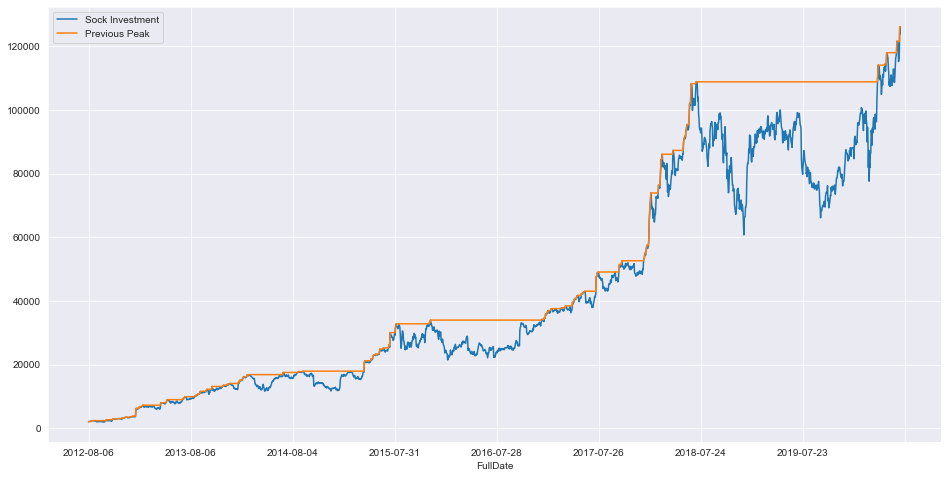

In [130]:
fun_drawdown(stocks_returns["NFLX"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [131]:
fun_drawdown(stocks_returns["MSFT"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2012.971208    2012.971208           0.0
2012-08-07      2034.049459    2034.049459           0.0
2012-08-08      2038.913623    2038.913623           0.0

In [132]:
fun_drawdown(stocks_returns["MSFT"]).min()

Sock Investment    1798.946126
Previous Peak      2012.971208
Max Drawdown         -0.280380
dtype: float64

In [133]:
fun_drawdown(stocks_returns["MSFT"]).idxmin()

Sock Investment    2012-12-04
Previous Peak      2012-08-06
Max Drawdown       2020-03-16
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

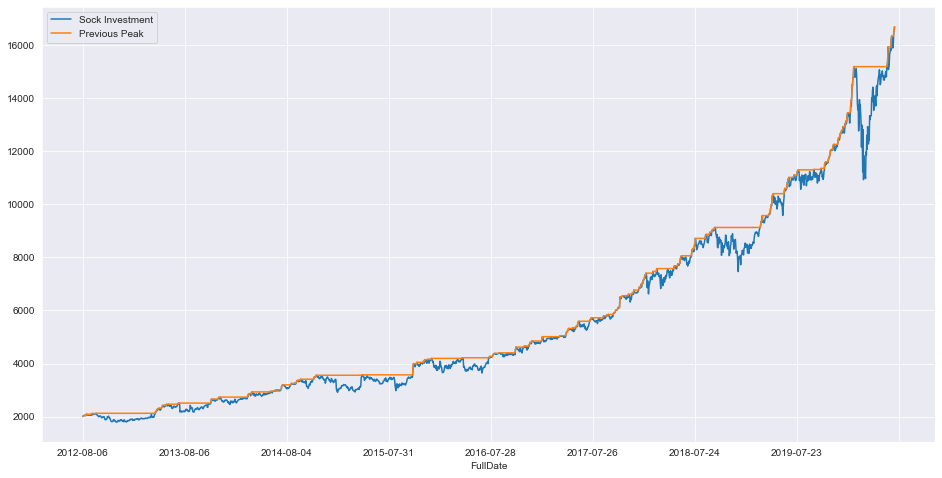

In [134]:
fun_drawdown(stocks_returns["MSFT"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [135]:
fun_drawdown(stocks_returns["GE"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2001.250810    2001.250810      0.000000
2012-08-07      2015.009486    2015.009486      0.000000
2012-08-08      2005.003242    2015.009486     -0.004966

In [136]:
fun_drawdown(stocks_returns["GE"]).min()

Sock Investment     685.428405
Previous Peak      2001.250810
Max Drawdown         -0.808993
dtype: float64

In [137]:
fun_drawdown(stocks_returns["GE"]).idxmin()

Sock Investment    2020-05-15
Previous Peak      2012-08-06
Max Drawdown       2020-05-15
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

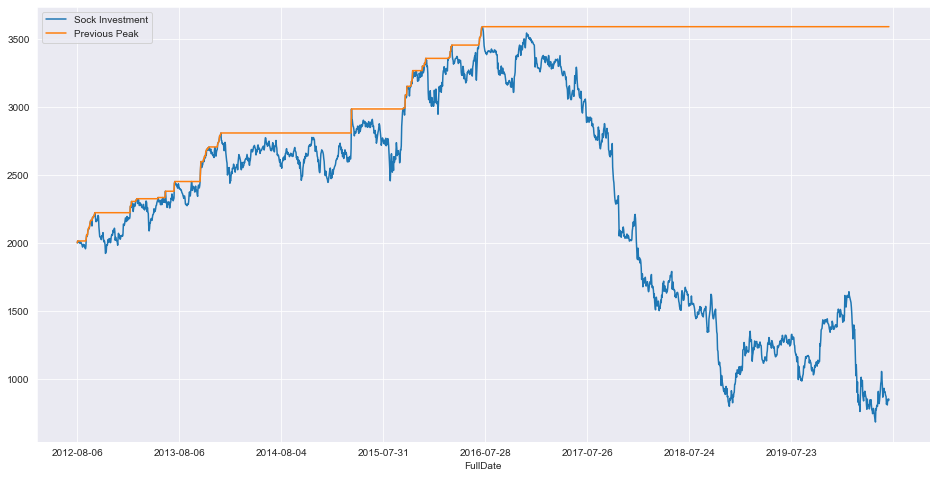

In [138]:
fun_drawdown(stocks_returns["GE"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [139]:
fun_drawdown(stocks_returns["J"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2018.065896    2018.065896      0.000000
2012-08-07      2017.003172    2018.065896     -0.000527
2012-08-08      2031.349637    2031.349637      0.000000

In [140]:
fun_drawdown(stocks_returns["J"]).min()

Sock Investment    1798.618439
Previous Peak      2018.065896
Max Drawdown         -0.475194
dtype: float64

In [141]:
fun_drawdown(stocks_returns["J"]).idxmin()

Sock Investment    2016-02-11
Previous Peak      2012-08-06
Max Drawdown       2016-02-11
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

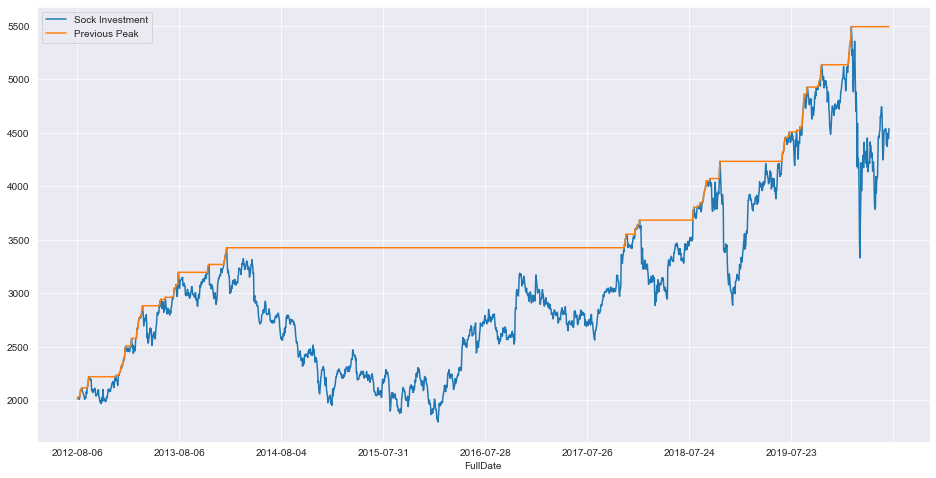

In [142]:
fun_drawdown(stocks_returns["J"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [143]:
fun_drawdown(stocks_returns["TSLA"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2073.394603    2073.394603      0.000000
2012-08-07      2220.183634    2220.183634      0.000000
2012-08-08      2135.779954    2220.183634     -0.038017

In [144]:
fun_drawdown(stocks_returns["TSLA"]).min()

Sock Investment    2007.339443
Previous Peak      2073.394603
Max Drawdown         -0.606279
dtype: float64

In [145]:
fun_drawdown(stocks_returns["TSLA"]).idxmin()

Sock Investment    2012-10-15
Previous Peak      2012-08-06
Max Drawdown       2020-03-18
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

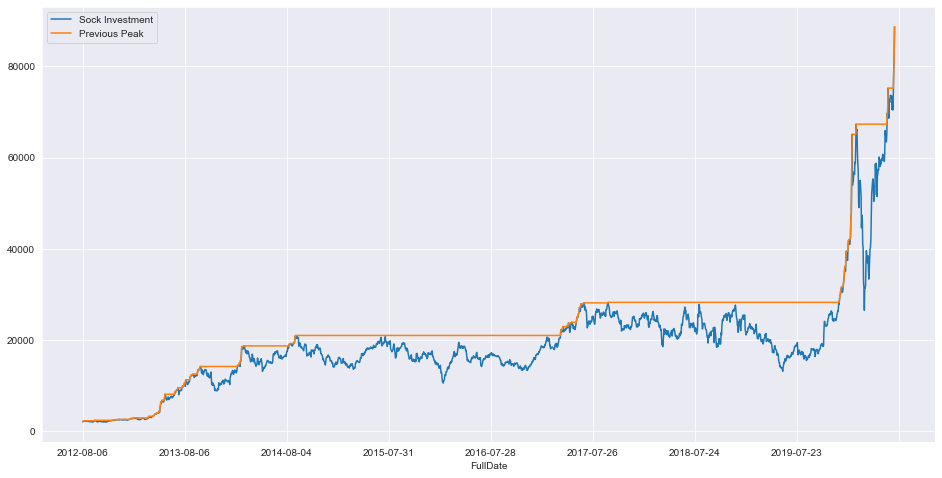

In [146]:
fun_drawdown(stocks_returns["TSLA"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [147]:
fun_drawdown(stocks_returns["BA"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2002.006064    2002.006064           0.0
2012-08-07      2045.135355    2045.135355           0.0
2012-08-08      2049.147483    2049.147483           0.0

In [148]:
fun_drawdown(stocks_returns["BA"]).min()

Sock Investment    1917.084602
Previous Peak      2002.006064
Max Drawdown         -0.779201
dtype: float64

In [149]:
fun_drawdown(stocks_returns["BA"]).idxmin()

Sock Investment    2012-09-25
Previous Peak      2012-08-06
Max Drawdown       2020-03-20
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'BA'}, xlabel='FullDate'>

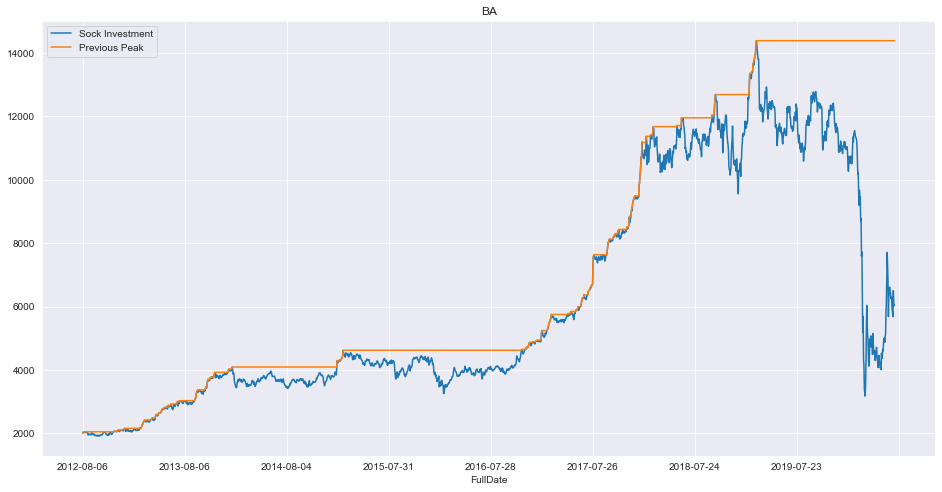

In [150]:
fun_drawdown(stocks_returns["BA"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8), title='BA')

In [151]:
fun_drawdown(stocks_returns["PG"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2009.376897    2009.376897           0.0
2012-08-07      2021.879328    2021.879328           0.0
2012-08-08      2037.116655    2037.116655           0.0

In [152]:
fun_drawdown(stocks_returns["PG"]).min()

Sock Investment    2009.376897
Previous Peak      2009.376897
Max Drawdown         -0.254564
dtype: float64

In [153]:
fun_drawdown(stocks_returns["PG"]).idxmin()

Sock Investment    2012-08-06
Previous Peak      2012-08-06
Max Drawdown       2015-09-14
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

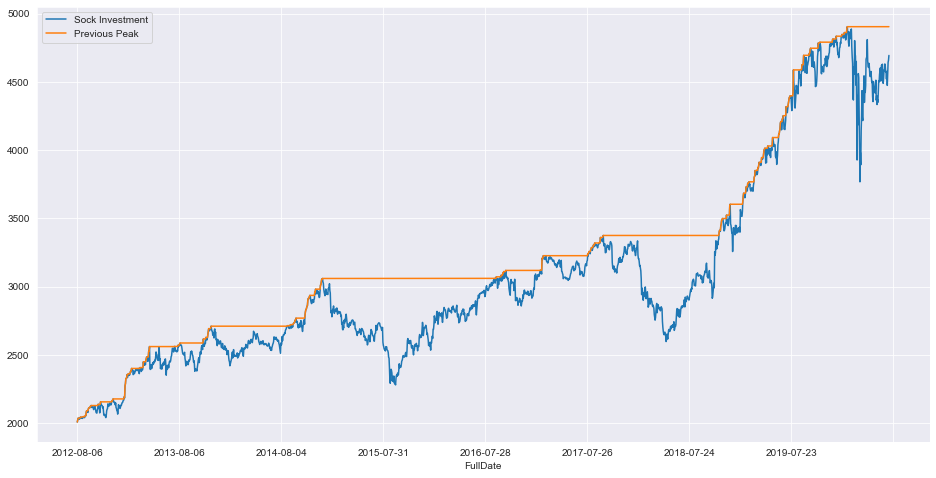

In [154]:
fun_drawdown(stocks_returns["PG"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [155]:
fun_drawdown(stocks_returns["OPK"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      1990.675999    1990.675999      0.000000
2012-08-07      1990.675999    1990.675999      0.000000
2012-08-08      1986.014110    1990.675999     -0.002342

In [156]:
fun_drawdown(stocks_returns["OPK"]).min()

Sock Investment     536.130530
Previous Peak      1990.675999
Max Drawdown         -0.939854
dtype: float64

In [157]:
fun_drawdown(stocks_returns["OPK"]).idxmin()

Sock Investment    2020-04-02
Previous Peak      2012-08-06
Max Drawdown       2020-04-02
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


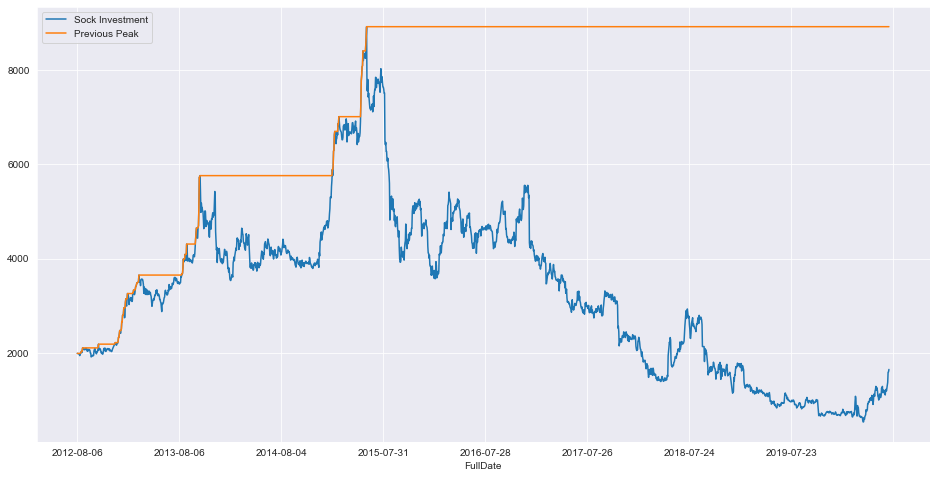

In [158]:
fun_drawdown(stocks_returns["OPK"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8));

In [176]:
fun_drawdown(stocks_returns["HD"]).head(10)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      1988.983343    1988.983343      0.000000
2012-08-07      2004.131290    2004.131290      0.000000
2012-08-08      2019.279412    2019.279412      0.000000
2012-08-09      2033.050320    2033.050320      0.000000
2012-08-10      2029.377985    2033.050320     -0.001806
2012-08-13      2020.197321    2033.050320     -0.006322
2012-08-14      2092.724373    2092.724373      0.000000
2012-08-15      2103.741205    2103.741205      0.000000
2012-08-16      2153.775465    2153.775465      0.000000
2012-08-17      2169.841670    2169.841670      0.000000

In [177]:
fun_drawdown(stocks_returns["HD"]).tail(10)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2020-06-19     11262.795608   11724.581132     -0.039386
2020-06-22     11377.094691   11724.581132     -0.029637
2020-06-23     11429.883027   11724.581132     -0.025135
2020-06-24     11238.925777   11724.581132     -0.041422
2020-06-25     11204.498419   11724.581132     -0.044358
2020-06-26     11005.278939   11724.581132     -0.061350
2020-06-29     11238.466998   11724.581132     -0.041461
2020-06-30     11439.063516   11724.581132     -0.024352
2020-07-01     11331.191546   11724.581132     -0.033553
2020-07-02     11347.257227   11724.581132     -0.032182

In [160]:
fun_drawdown(stocks_returns["HD"]).min()

Sock Investment    1988.983343
Previous Peak      1988.983343
Max Drawdown         -0.379946
dtype: float64

In [161]:
fun_drawdown(stocks_returns["HD"]).idxmin()

Sock Investment    2012-08-06
Previous Peak      2012-08-06
Max Drawdown       2020-03-20
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

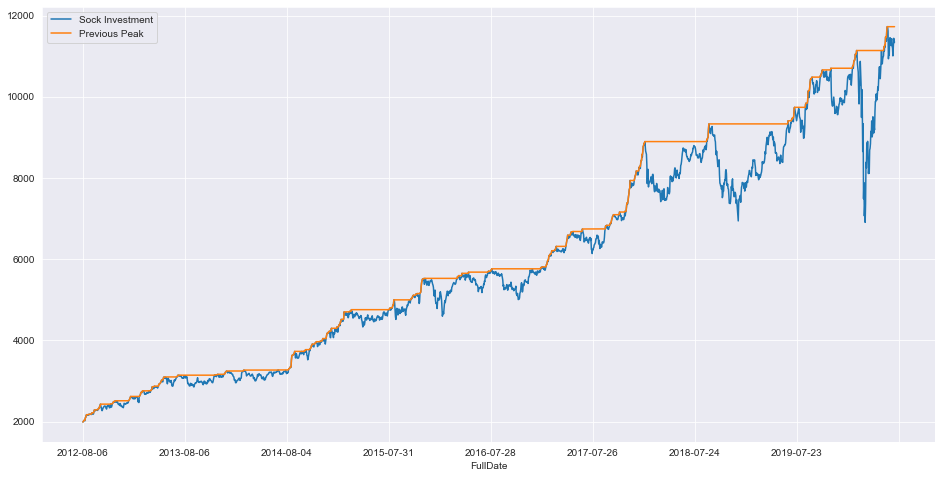

In [162]:
fun_drawdown(stocks_returns["HD"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [163]:
fun_drawdown(stocks_returns["JPM"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2011.107244    2011.107244           0.0
2012-08-07      2050.676950    2050.676950           0.0
2012-08-08      2059.007317    2059.007317           0.0

In [164]:
fun_drawdown(stocks_returns["JPM"]).min()

Sock Investment    2011.107244
Previous Peak      2011.107244
Max Drawdown         -0.436286
dtype: float64

In [165]:
fun_drawdown(stocks_returns["JPM"]).idxmin()

Sock Investment    2012-08-06
Previous Peak      2012-08-06
Max Drawdown       2020-03-23
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

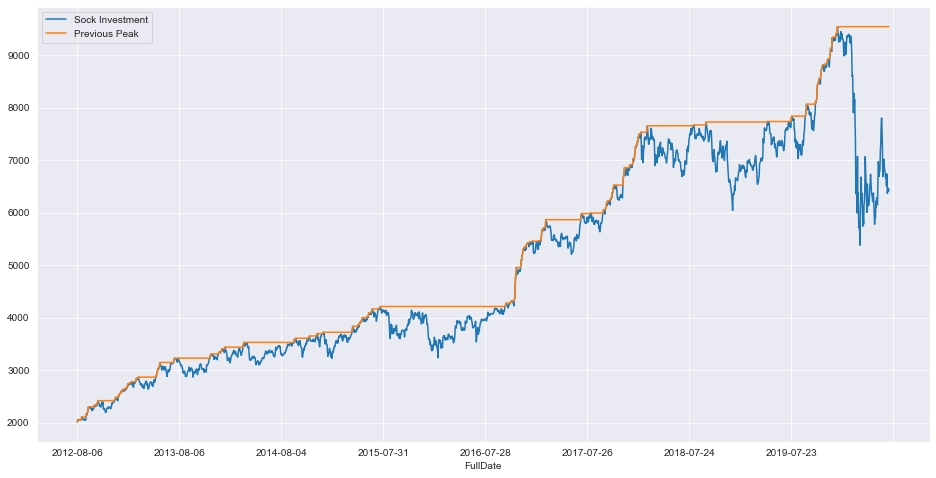

In [166]:
fun_drawdown(stocks_returns["JPM"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [175]:
fun_drawdown(stocks_returns["V"]).head(10)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      2000.648944    2000.648944      0.000000
2012-08-07      1990.915030    2000.648944     -0.004865
2012-08-08      2002.595777    2002.595777      0.000000
2012-08-09      1962.362107    2002.595777     -0.020091
2012-08-10      1970.798257    2002.595777     -0.015878
2012-08-13      1959.117510    2002.595777     -0.021711
2012-08-14      1983.127824    2002.595777     -0.009721
2012-08-15      1974.042854    2002.595777     -0.014258
2012-08-16      1983.127824    2002.595777     -0.009721
2012-08-17      1968.202480    2002.595777     -0.017174

In [168]:
fun_drawdown(stocks_returns["V"]).min()

Sock Investment    1937.053905
Previous Peak      2000.648944
Max Drawdown         -0.363636
dtype: float64

In [169]:
fun_drawdown(stocks_returns["V"]).idxmin()

Sock Investment    2012-08-24
Previous Peak      2012-08-06
Max Drawdown       2020-03-23
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

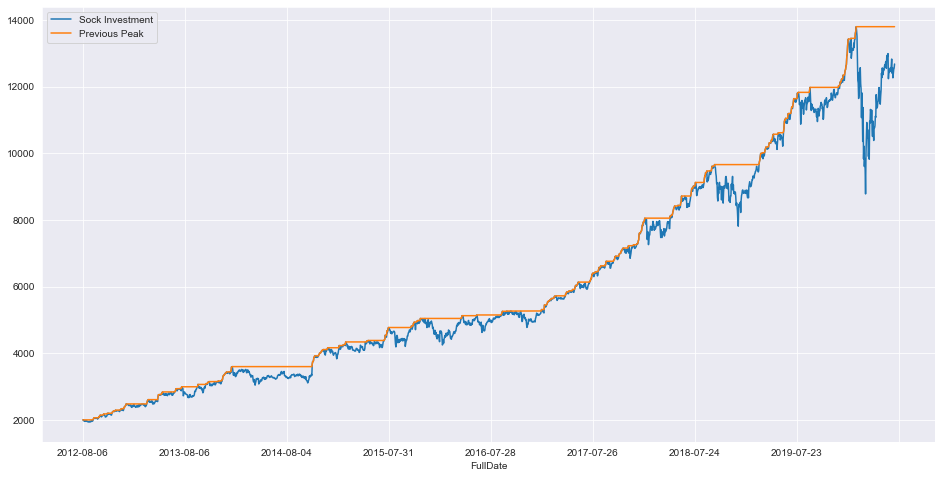

In [170]:
fun_drawdown(stocks_returns["V"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))

In [171]:
fun_drawdown(stocks_returns["UNH"]).head(3)

Sock Investment  Previous Peak  Max Drawdown
FullDate                                                
2012-08-06      1976.470642    1976.470642           0.0
2012-08-07      2035.960106    2035.960106           0.0
2012-08-08      2043.507195    2043.507195           0.0

In [172]:
fun_drawdown(stocks_returns["UNH"]).min()

Sock Investment    1976.470642
Previous Peak      1976.470642
Max Drawdown         -0.358998
dtype: float64

In [173]:
fun_drawdown(stocks_returns["UNH"]).idxmin()

Sock Investment    2012-08-06
Previous Peak      2012-08-06
Max Drawdown       2020-03-23
dtype: object

C:\Users\sonia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='FullDate'>

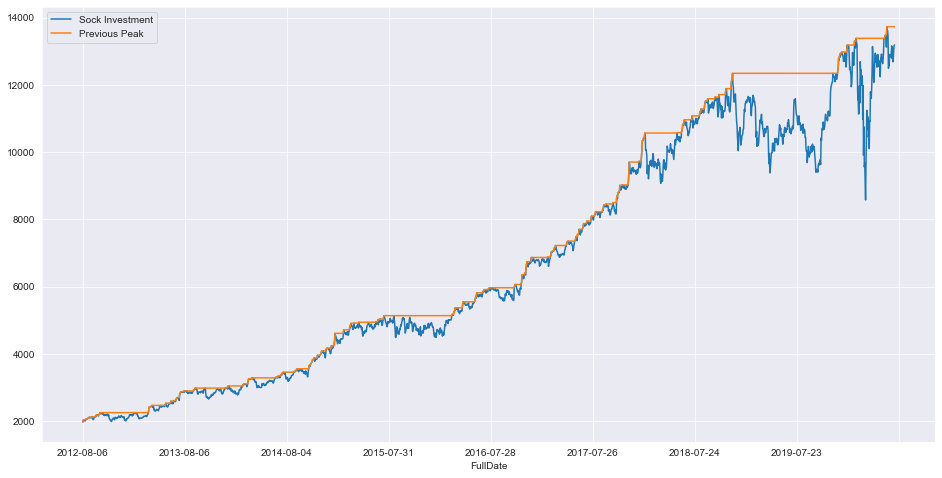

In [174]:
fun_drawdown(stocks_returns["UNH"])[["Sock Investment","Previous Peak"]].plot(figsize=(16,8))